### Visualize W&B results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import wandb
wandb.login()

wandb: Currently logged in as: simonkral99 (uni-ma) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [2]:
api = wandb.Api()

# Replace with your actual W&B username and project name
runs = api.runs("simonkral99/Thesis_MTSF")

In [3]:

run_data = []

for run in runs:
    summary = run.summary._json_dict
    config = {k: v for k, v in run.config.items() if not k.startswith('_')}
    run_data.append({**config, **summary, "run_id": run.id, "name": run.name})

df = pd.DataFrame(run_data)

#print(df.columns)

columns_to_keep = ['model', 'pred_len', 'random_seed', 'patience', 'data_path', 'mae', 'mse', 'seq_len', 'conv_kernel_size', 'n_blocks', 'cd_regularization', 'learn_cd_regularization', 
                   'convex', 'sigmoid', 'lambda_freeze_patience', "cd_weight_decay", "mse_train", "mae_train", "mse_train_per_channel_list", "mse_per_channel_list"
                   , "mae_train_per_channel_list", "mae_per_channel_list", "channel_handling"]

# Keep only those columns
df_subset = df[columns_to_keep]
df_subset['data_path'] = df_subset['data_path'].str.replace('.csv', '', regex=False)

#display(df_subset)
#print(df.columns)

/scratch/ipykernel_196379/1843248664.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['data_path'] = df_subset['data_path'].str.replace('.csv', '', regex=False)


In [4]:
#df[df['model'] == 'Linear_Delta_reg'][['my_list', 'my_list_table']]

### Results published in papers

In [5]:
paper_results_df = pd.read_csv('../paper_results.csv')
paper_results_df.head()

,Dataset,Prediction Length,MSE,MAE,model,source,ci_cd,model_source
0,ETTm1,96,0.288,0.343,TVNet,li2025_tvnet,CD,TVNet (li2025_tvnet)
1,ETTm1,192,0.326,0.367,TVNet,li2025_tvnet,CD,TVNet (li2025_tvnet)
2,ETTm1,336,0.365,0.391,TVNet,li2025_tvnet,CD,TVNet (li2025_tvnet)
3,ETTm1,720,0.412,0.413,TVNet,li2025_tvnet,CD,TVNet (li2025_tvnet)
4,ETTm1,Avg,0.348,0.379,TVNet,li2025_tvnet,CD,TVNet (li2025_tvnet)


### HPO

In [6]:
model = "Simon_DWSC"
#data = "ETTh1"
hyperparam = "conv_kernel_size"
metric = "mse"

df_hpo = df_subset[(df_subset['model'] == model)]
#df_hpo = df_hpo.dropna()
df_hpo = df_hpo.sort_values(by=hyperparam, ascending=True)
display(df_hpo.head())

df_ref = paper_results_df[
    (paper_results_df['source'] == "nie2023_patchtst") #| 
    #(paper_results_df['model'] == "Linear") | (paper_results_df['model'] == "Linear_CI") | (paper_results_df['model'] == "Linear_CD")
    #(paper_results_df['model'] == "Linear_CI") | (paper_results_df['model'] == "Linear_CD")
]

df_ref.columns = ['data_path', 'pred_len', 'mse', 'mae', 'model', 'source', 'ci_cd', 'model_source']
df_ref = df_ref.replace("ILI", "national_illness")
df_ref = df_ref.replace("Traffic", "traffic")
df_ref = df_ref.replace("Weather", "weather")

df_ref = df_ref.dropna()

color_map = {'CI': 'tab:blue', 'CD': 'tab:orange'}

display(df_ref.head())

,model,pred_len,random_seed,patience,data_path,mae,mse,seq_len,conv_kernel_size,n_blocks,...,sigmoid,lambda_freeze_patience,cd_weight_decay,mse_train,mae_train,mse_train_per_channel_list,mse_per_channel_list,mae_train_per_channel_list,mae_per_channel_list,channel_handling
20,Simon_DWSC,24,2021,100,national_illness,1.015148,2.353054,104,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,Simon_DWSC,60,2021,100,national_illness,1.035644,2.504811,104,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,Simon_DWSC,96,2021,100,ETTh1,0.439837,0.432434,336,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,Simon_DWSC,720,2021,100,ETTh1,0.761976,0.945581,336,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,Simon_DWSC,96,2021,100,traffic,0.474268,0.770797,336,5.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,data_path,pred_len,mse,mae,model,source,ci_cd,model_source
400,ETTm1,96,0.29300,0.346,PatchTST/64,nie2023_patchtst,CI,PatchTST/64 (nie2023_patchtst)
401,ETTm1,192,0.33300,0.370,PatchTST/64,nie2023_patchtst,CI,PatchTST/64 (nie2023_patchtst)
402,ETTm1,336,0.36900,0.392,PatchTST/64,nie2023_patchtst,CI,PatchTST/64 (nie2023_patchtst)
403,ETTm1,720,0.41600,0.420,PatchTST/64,nie2023_patchtst,CI,PatchTST/64 (nie2023_patchtst)
404,ETTm1,Avg,0.35275,0.382,PatchTST/64,nie2023_patchtst,CI,PatchTST/64 (nie2023_patchtst)


# Delta model

In [7]:
model = "Linear_Delta"
metric = "mse"
hyperparam = "cd_regularization"

df_delta = df_subset[(df_subset['model'] == model)]
#df_delta = df_delta.dropna()
df_delta = df_delta.sort_values(by=hyperparam, ascending=True)
#display(df_delta.head())

# CI + CD noch visual.!


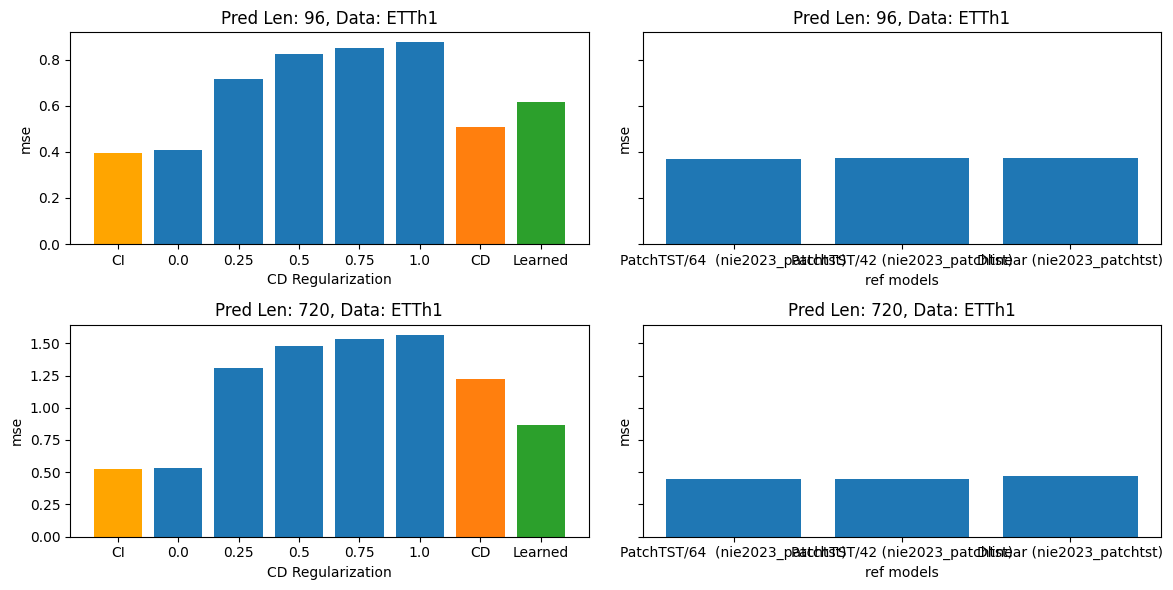

In [8]:
pred_len_list = [96, 720]
data_path_list = ["ETTh1"]

fig, axs = plt.subplots(len(pred_len_list)*len(data_path_list), 2, figsize=(12, 6), sharey='row')

#df_ref = df_ref[(df_ref['data_path'] == "ETTh1")]

for i, pred_len in enumerate(pred_len_list):
    for j, data_path in enumerate(data_path_list):
        #df_CI = df_subset[(df_subset['model'] == "Linear") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len)]
        df_CI = df_subset[(df_subset['model'] == "Linear") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len) & (df_subset['seq_len'] == 96)]
        axs[i * len(data_path_list) + j, 0].bar("CI", df_CI[metric], color='orange')

        df_filtered = df_delta[(df_delta['pred_len'] == pred_len) & (df_delta['data_path'] == data_path) & (df_delta['learn_cd_regularization'] == False)]
        axs[i * len(data_path_list) + j, 0].bar(df_filtered[hyperparam].astype(float).astype(str), df_filtered[metric])
        axs[i * len(data_path_list) + j, 0].set_title(f'Pred Len: {pred_len}, Data: {data_path}')
        axs[i * len(data_path_list) + j, 0].set_ylabel(metric)
        axs[i * len(data_path_list) + j, 0].set_xlabel("CD Regularization")

        #df_CD = df_subset[(df_subset['model'] == "Linear_CD") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len)]
        df_CD = df_subset[(df_subset['model'] == "Linear_CD") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len) & (df_subset['seq_len'] == 96)]
        axs[i * len(data_path_list) + j, 0].bar("CD", df_CD[metric])

        df_filtered = df_delta[(df_delta['pred_len'] == pred_len) & (df_delta['data_path'] == data_path) & (df_delta['learn_cd_regularization'] == True)]
        axs[i * len(data_path_list) + j, 0].bar("Learned", df_filtered[metric])

        df_filtered = df_ref[(df_ref['pred_len'] == str(pred_len)) & (df_ref['data_path'] == data_path)]    # str(pred_len) to match the type in df_ref, "Avg"...
        categories = df_filtered["ci_cd"].tolist()
        colors = [color_map[cat] for cat in categories]
        axs[i * len(data_path_list) + j, 1].bar(df_filtered["model_source"], df_filtered[metric], color=colors)
        axs[i * len(data_path_list) + j, 1].set_title(f'Pred Len: {pred_len}, Data: {data_path}')
        axs[i * len(data_path_list) + j, 1].set_ylabel(metric)
        axs[i * len(data_path_list) + j, 1].set_xlabel("ref models")

plt.tight_layout()
plt.savefig("plots/Delta/"+data_path+"_"+model+".png", dpi=300)
plt.show()

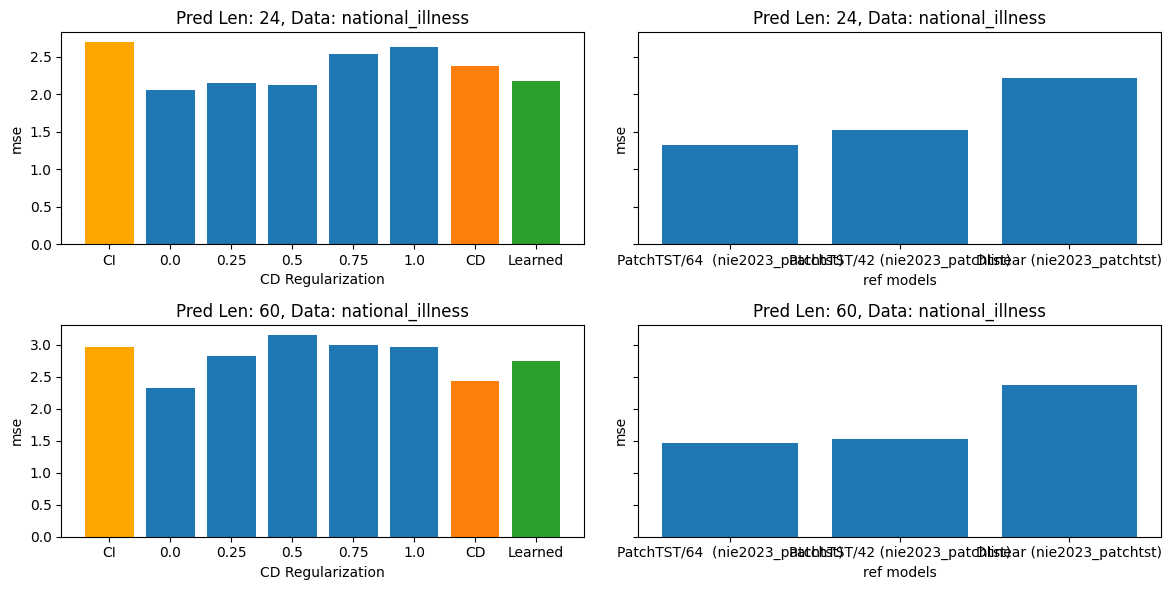

In [9]:
pred_len_list = [24, 60]
data_path_list = ["national_illness"]

fig, axs = plt.subplots(len(pred_len_list)*len(data_path_list), 2, figsize=(12, 6), sharey='row')

#df_ref = df_ref[(df_ref['data_path'] == "ETTh1")]

for i, pred_len in enumerate(pred_len_list):
    for j, data_path in enumerate(data_path_list):
        #df_CI = df_subset[(df_subset['model'] == "Linear") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len)]
        df_CI = df_subset[(df_subset['model'] == "Linear") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len) & (df_subset['seq_len'] == 36)]
        axs[i * len(data_path_list) + j, 0].bar("CI", df_CI[metric], color='orange')
        
        df_filtered = df_delta[(df_delta['pred_len'] == pred_len) & (df_delta['data_path'] == data_path) & (df_delta['learn_cd_regularization'] == False)]
        axs[i * len(data_path_list) + j, 0].bar(df_filtered[hyperparam].astype(float).astype(str), df_filtered[metric])
        axs[i * len(data_path_list) + j, 0].set_title(f'Pred Len: {pred_len}, Data: {data_path}')
        axs[i * len(data_path_list) + j, 0].set_ylabel(metric)
        axs[i * len(data_path_list) + j, 0].set_xlabel("CD Regularization")

        #df_CD = df_subset[(df_subset['model'] == "Linear_CD") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len)]
        df_CD = df_subset[(df_subset['model'] == "Linear_CD") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len) & (df_subset['seq_len'] == 36)]
        axs[i * len(data_path_list) + j, 0].bar("CD", df_CD[metric])

        df_filtered = df_delta[(df_delta['pred_len'] == pred_len) & (df_delta['data_path'] == data_path) & (df_delta['learn_cd_regularization'] == True)]
        axs[i * len(data_path_list) + j, 0].bar("Learned", df_filtered[metric])

        df_filtered = df_ref[(df_ref['pred_len'] == str(pred_len)) & (df_ref['data_path'] == data_path)]    # str(pred_len) to match the type in df_ref, "Avg"...
        categories = df_filtered["ci_cd"].tolist()
        colors = [color_map[cat] for cat in categories]
        axs[i * len(data_path_list) + j, 1].bar(df_filtered["model_source"], df_filtered[metric], color=colors)
        axs[i * len(data_path_list) + j, 1].set_title(f'Pred Len: {pred_len}, Data: {data_path}')
        axs[i * len(data_path_list) + j, 1].set_ylabel(metric)
        axs[i * len(data_path_list) + j, 1].set_xlabel("ref models")

plt.tight_layout()
plt.savefig("plots/Delta/"+data_path+"_"+model+".png", dpi=300)
plt.show()

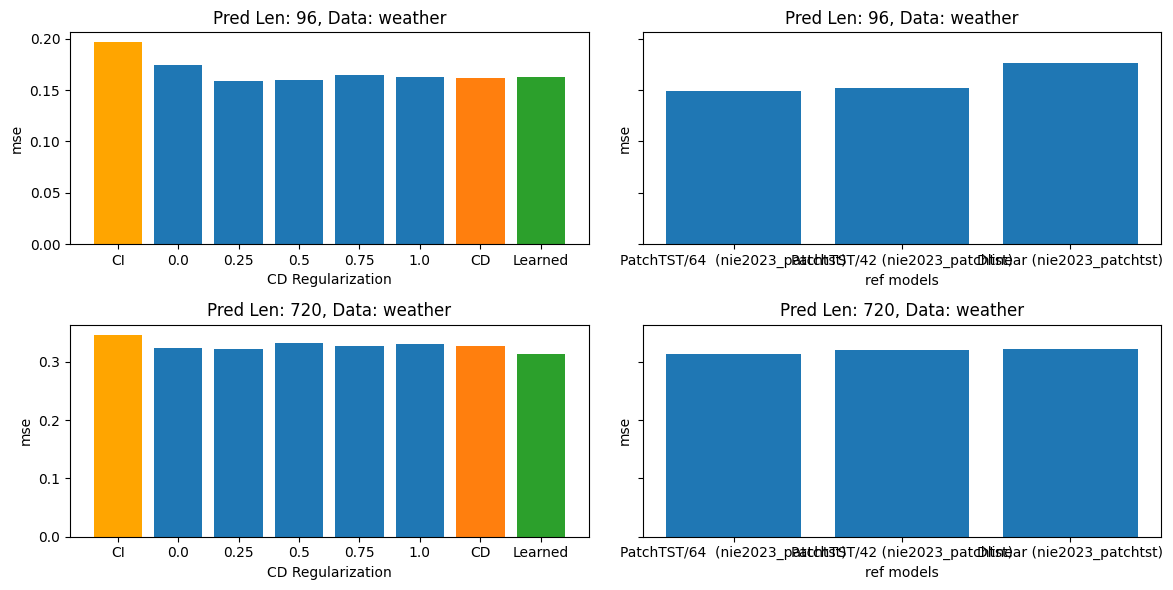

In [10]:
pred_len_list = [96, 720]
data_path_list = ["weather"]

fig, axs = plt.subplots(len(pred_len_list)*len(data_path_list), 2, figsize=(12, 6), sharey='row')

#df_ref = df_ref[(df_ref['data_path'] == "ETTh1")]

for i, pred_len in enumerate(pred_len_list):
    for j, data_path in enumerate(data_path_list):
        #df_CI = df_subset[(df_subset['model'] == "Linear") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len)]
        df_CI = df_subset[(df_subset['model'] == "Linear") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len) & (df_subset['seq_len'] == 96)]
        axs[i * len(data_path_list) + j, 0].bar("CI", df_CI[metric], color='orange')

        df_filtered = df_delta[(df_delta['pred_len'] == pred_len) & (df_delta['data_path'] == data_path) & (df_delta['learn_cd_regularization'] == False)]
        axs[i * len(data_path_list) + j, 0].bar(df_filtered[hyperparam].astype(float).astype(str), df_filtered[metric])
        axs[i * len(data_path_list) + j, 0].set_title(f'Pred Len: {pred_len}, Data: {data_path}')
        axs[i * len(data_path_list) + j, 0].set_ylabel(metric)
        axs[i * len(data_path_list) + j, 0].set_xlabel("CD Regularization")

        #df_CD = df_subset[(df_subset['model'] == "Linear_CD") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len)]
        df_CD = df_subset[(df_subset['model'] == "Linear_CD") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len) & (df_subset['seq_len'] == 96)]
        axs[i * len(data_path_list) + j, 0].bar("CD", df_CD[metric])

        df_filtered = df_delta[(df_delta['pred_len'] == pred_len) & (df_delta['data_path'] == data_path) & (df_delta['learn_cd_regularization'] == True)]
        axs[i * len(data_path_list) + j, 0].bar("Learned", df_filtered[metric])

        df_filtered = df_ref[(df_ref['pred_len'] == str(pred_len)) & (df_ref['data_path'] == data_path)]    # str(pred_len) to match the type in df_ref, "Avg"...
        categories = df_filtered["ci_cd"].tolist()
        colors = [color_map[cat] for cat in categories]
        axs[i * len(data_path_list) + j, 1].bar(df_filtered["model_source"], df_filtered[metric], color=colors)
        axs[i * len(data_path_list) + j, 1].set_title(f'Pred Len: {pred_len}, Data: {data_path}')
        axs[i * len(data_path_list) + j, 1].set_ylabel(metric)
        axs[i * len(data_path_list) + j, 1].set_xlabel("ref models")

plt.tight_layout()
plt.savefig("plots/Delta/"+data_path+"_"+model+".png", dpi=300)
plt.show()

# Compare results (han2024_capacity)

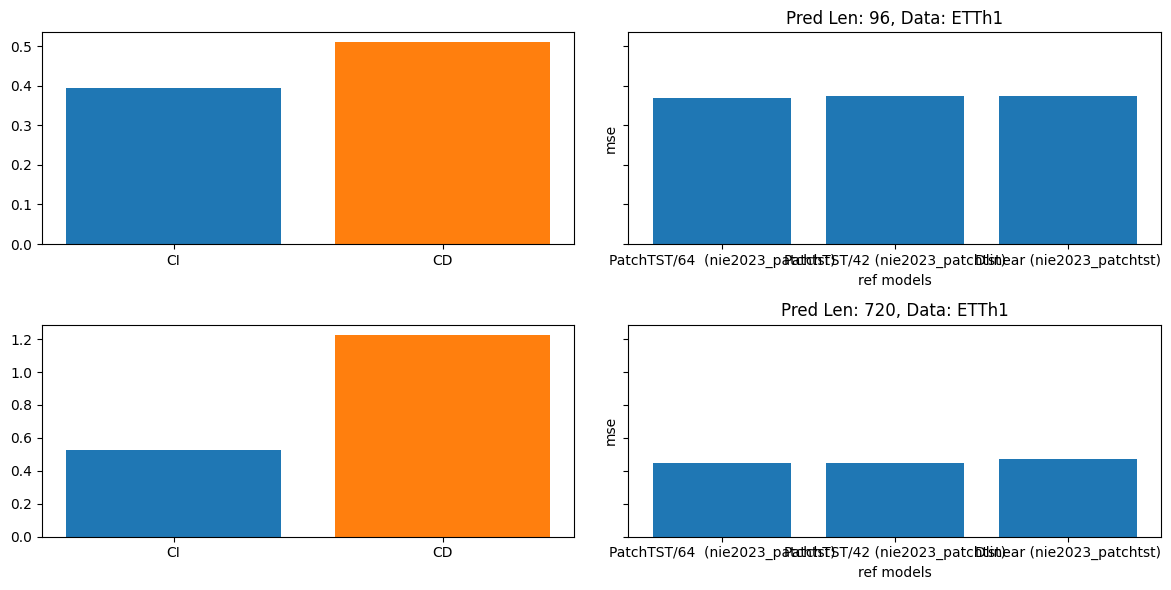

In [11]:
pred_len_list = [96, 720]
data_path_list = ["ETTh1"]

fig, axs = plt.subplots(len(pred_len_list)*len(data_path_list), 2, figsize=(12, 6), sharey='row')

#df_ref = df_ref[(df_ref['data_path'] == "ETTh1")]

for i, pred_len in enumerate(pred_len_list):
    for j, data_path in enumerate(data_path_list):
        #df_CI = df_subset[(df_subset['model'] == "Linear") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len)]
        df_CI = df_subset[(df_subset['model'] == "Linear") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len) & (df_subset['seq_len'] == 96)]
        axs[i * len(data_path_list) + j, 0].bar("CI", df_CI[metric])

        #df_CD = df_subset[(df_subset['model'] == "Linear_CD") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len)]
        df_CD = df_subset[(df_subset['model'] == "Linear_CD") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len) & (df_subset['seq_len'] == 96)]
        axs[i * len(data_path_list) + j, 0].bar("CD", df_CD[metric])

        df_filtered = df_ref[(df_ref['pred_len'] == str(pred_len)) & (df_ref['data_path'] == data_path)]    # str(pred_len) to match the type in df_ref, "Avg"...
        categories = df_filtered["ci_cd"].tolist()
        colors = [color_map[cat] for cat in categories]
        axs[i * len(data_path_list) + j, 1].bar(df_filtered["model_source"], df_filtered[metric], color=colors)
        axs[i * len(data_path_list) + j, 1].set_title(f'Pred Len: {pred_len}, Data: {data_path}')
        axs[i * len(data_path_list) + j, 1].set_ylabel(metric)
        axs[i * len(data_path_list) + j, 1].set_xlabel("ref models")

plt.tight_layout()
plt.savefig("plots/Comp/"+data_path+"_"+model+".png")
plt.show()

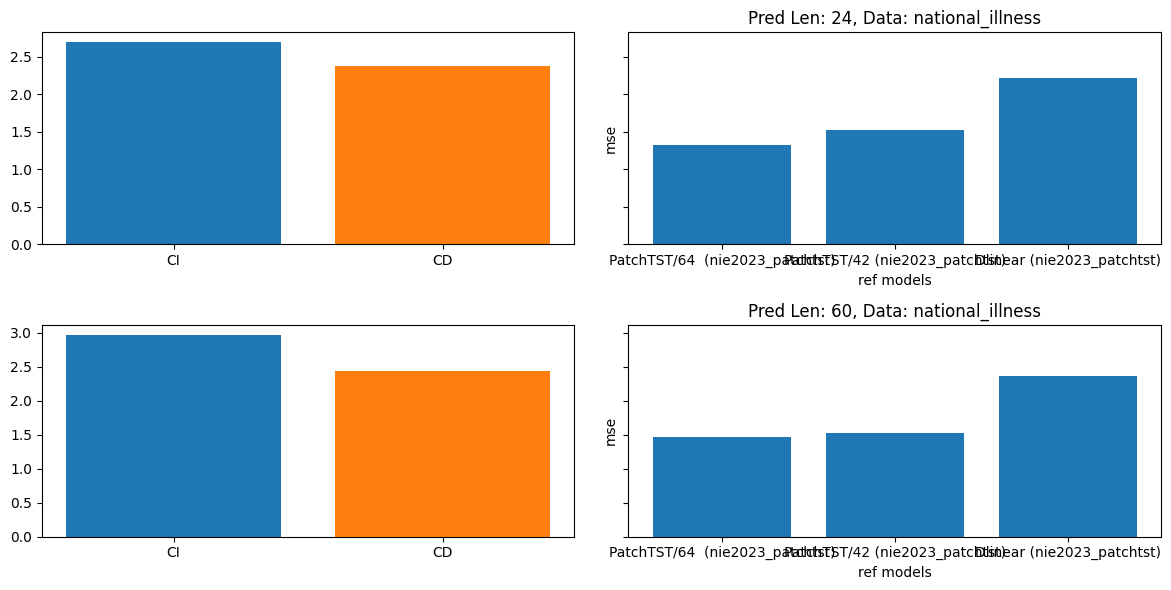

In [12]:
pred_len_list = [24, 60]
data_path_list = ["national_illness"]

fig, axs = plt.subplots(len(pred_len_list)*len(data_path_list), 2, figsize=(12, 6), sharey='row')

#df_ref = df_ref[(df_ref['data_path'] == "ETTh1")]

for i, pred_len in enumerate(pred_len_list):
    for j, data_path in enumerate(data_path_list):
        #df_CI = df_subset[(df_subset['model'] == "Linear") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len)]
        df_CI = df_subset[(df_subset['model'] == "Linear") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len) & (df_subset['seq_len'] == 36)]
        axs[i * len(data_path_list) + j, 0].bar("CI", df_CI[metric])

        #df_CD = df_subset[(df_subset['model'] == "Linear_CD") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len)]
        df_CD = df_subset[(df_subset['model'] == "Linear_CD") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len) & (df_subset['seq_len'] == 36)]
        axs[i * len(data_path_list) + j, 0].bar("CD", df_CD[metric])

        df_filtered = df_ref[(df_ref['pred_len'] == str(pred_len)) & (df_ref['data_path'] == data_path)]    # str(pred_len) to match the type in df_ref, "Avg"...
        categories = df_filtered["ci_cd"].tolist()
        colors = [color_map[cat] for cat in categories]
        axs[i * len(data_path_list) + j, 1].bar(df_filtered["model_source"], df_filtered[metric], color=colors)
        axs[i * len(data_path_list) + j, 1].set_title(f'Pred Len: {pred_len}, Data: {data_path}')
        axs[i * len(data_path_list) + j, 1].set_ylabel(metric)
        axs[i * len(data_path_list) + j, 1].set_xlabel("ref models")

plt.tight_layout()
plt.savefig("plots/Comp/"+data_path+"_"+model+".png")
plt.show()

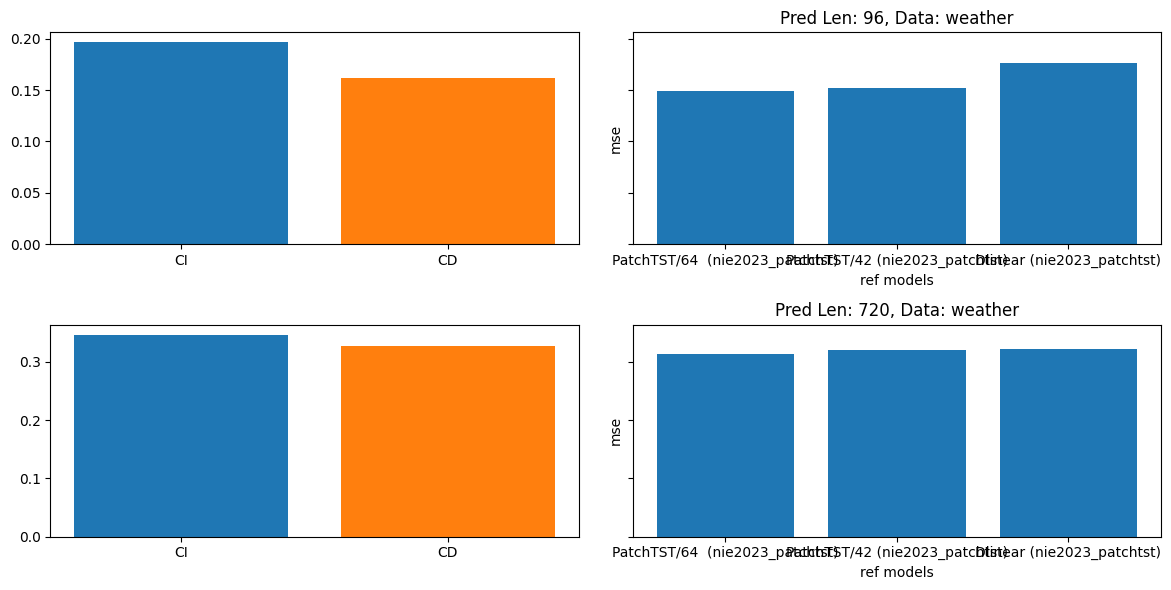

In [13]:
pred_len_list = [96, 720]
data_path_list = ["weather"]

fig, axs = plt.subplots(len(pred_len_list)*len(data_path_list), 2, figsize=(12, 6), sharey='row')

#df_ref = df_ref[(df_ref['data_path'] == "ETTh1")]

for i, pred_len in enumerate(pred_len_list):
    for j, data_path in enumerate(data_path_list):
        #df_CI = df_subset[(df_subset['model'] == "Linear") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len)]
        df_CI = df_subset[(df_subset['model'] == "Linear") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len) & (df_subset['seq_len'] == 96)]
        axs[i * len(data_path_list) + j, 0].bar("CI", df_CI[metric])

        #df_CD = df_subset[(df_subset['model'] == "Linear_CD") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len)]
        df_CD = df_subset[(df_subset['model'] == "Linear_CD") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len) & (df_subset['seq_len'] == 96)]
        axs[i * len(data_path_list) + j, 0].bar("CD", df_CD[metric])

        df_filtered = df_ref[(df_ref['pred_len'] == str(pred_len)) & (df_ref['data_path'] == data_path)]    # str(pred_len) to match the type in df_ref, "Avg"...
        categories = df_filtered["ci_cd"].tolist()
        colors = [color_map[cat] for cat in categories]
        axs[i * len(data_path_list) + j, 1].bar(df_filtered["model_source"], df_filtered[metric], color=colors)
        axs[i * len(data_path_list) + j, 1].set_title(f'Pred Len: {pred_len}, Data: {data_path}')
        axs[i * len(data_path_list) + j, 1].set_ylabel(metric)
        axs[i * len(data_path_list) + j, 1].set_xlabel("ref models")

plt.tight_layout()
plt.savefig("plots/Comp/"+data_path+"_"+model+".png")
plt.show()

# Convex

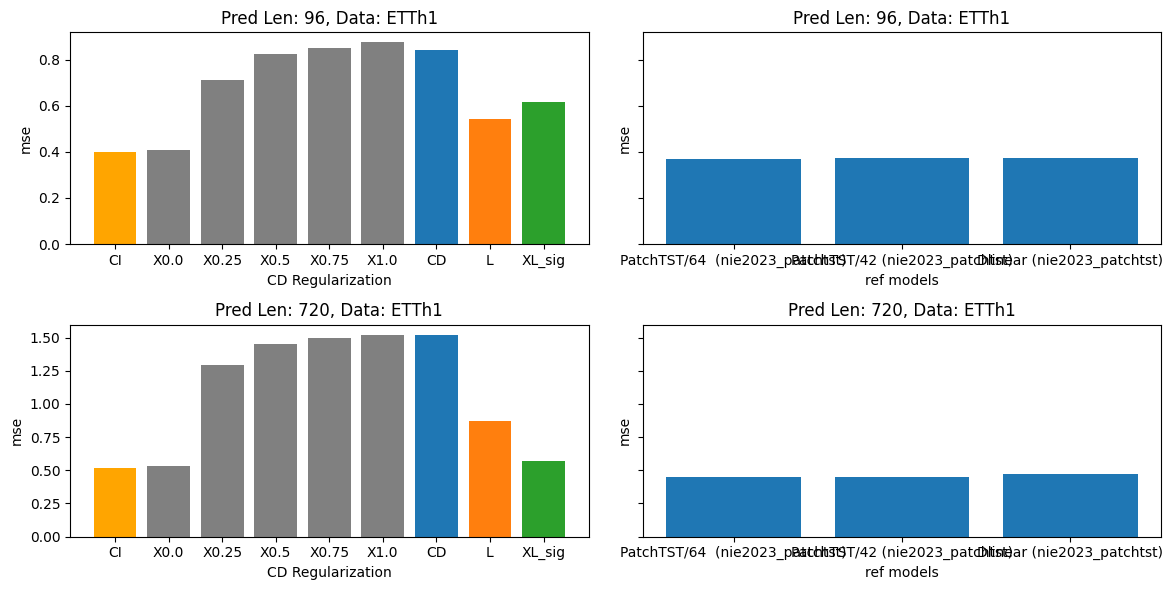

In [14]:
pred_len_list = [96, 720]
data_path_list = ["ETTh1"]

fig, axs = plt.subplots(len(pred_len_list)*len(data_path_list), 2, figsize=(12, 6), sharey='row')

#df_ref = df_ref[(df_ref['data_path'] == "ETTh1")]

for i, pred_len in enumerate(pred_len_list):
    for j, data_path in enumerate(data_path_list):
        #df_CI = df_subset[(df_subset['model'] == "Linear") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len)]
        df_CI = df_subset[(df_subset['model'] == "Linear") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len) & (df_subset['seq_len'] == 336)]
        axs[i * len(data_path_list) + j, 0].bar("CI", df_CI[metric], color='orange')

        """
        df_filtered = df_delta[(df_delta['pred_len'] == pred_len) & (df_delta['data_path'] == data_path) & (df_delta['learn_cd_regularization'] == False) & (df_delta['convex'].isna())]
        axs[i * len(data_path_list) + j, 0].bar(df_filtered[hyperparam].astype(float).astype(str), df_filtered[metric])
        axs[i * len(data_path_list) + j, 0].set_title(f'Pred Len: {pred_len}, Data: {data_path}')
        axs[i * len(data_path_list) + j, 0].set_ylabel(metric)
        axs[i * len(data_path_list) + j, 0].set_xlabel("CD Regularization")
        """

        df_filtered = df_delta[(df_delta['pred_len'] == pred_len) & (df_delta['data_path'] == data_path) & (df_delta['learn_cd_regularization'] == 0) & (df_delta['convex'] == 1)]
        axs[i * len(data_path_list) + j, 0].bar("X"+df_filtered[hyperparam].astype(float).astype(str), df_filtered[metric], color='grey')
        axs[i * len(data_path_list) + j, 0].set_title(f'Pred Len: {pred_len}, Data: {data_path}')
        axs[i * len(data_path_list) + j, 0].set_ylabel(metric)
        axs[i * len(data_path_list) + j, 0].set_xlabel("CD Regularization")

        #df_CD = df_subset[(df_subset['model'] == "Linear_CD") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len)]
        df_CD = df_subset[(df_subset['model'] == "Linear_CD") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len) & (df_subset['seq_len'] == 336)]
        axs[i * len(data_path_list) + j, 0].bar("CD", df_CD[metric])

        df_filtered = df_delta[(df_delta['pred_len'] == pred_len) & (df_delta['data_path'] == data_path) & (df_delta['learn_cd_regularization'] == True) & (df_delta['convex'].isna())]
        axs[i * len(data_path_list) + j, 0].bar("L", df_filtered[metric])

        df_filtered = df_delta[(df_delta['pred_len'] == pred_len) & (df_delta['data_path'] == data_path) & (df_delta['learn_cd_regularization'] == 1) & (df_delta['convex'] == 1) & (df_delta['sigmoid'] == 1)]
        axs[i * len(data_path_list) + j, 0].bar("XL_sig", df_filtered[metric])

        df_filtered = df_ref[(df_ref['pred_len'] == str(pred_len)) & (df_ref['data_path'] == data_path)]    # str(pred_len) to match the type in df_ref, "Avg"...
        categories = df_filtered["ci_cd"].tolist()
        colors = [color_map[cat] for cat in categories]
        axs[i * len(data_path_list) + j, 1].bar(df_filtered["model_source"], df_filtered[metric], color=colors)
        axs[i * len(data_path_list) + j, 1].set_title(f'Pred Len: {pred_len}, Data: {data_path}')
        axs[i * len(data_path_list) + j, 1].set_ylabel(metric)
        axs[i * len(data_path_list) + j, 1].set_xlabel("ref models")

plt.tight_layout()
plt.savefig("plots/Delta/"+data_path+"_"+model+"_v2.png")
plt.show()

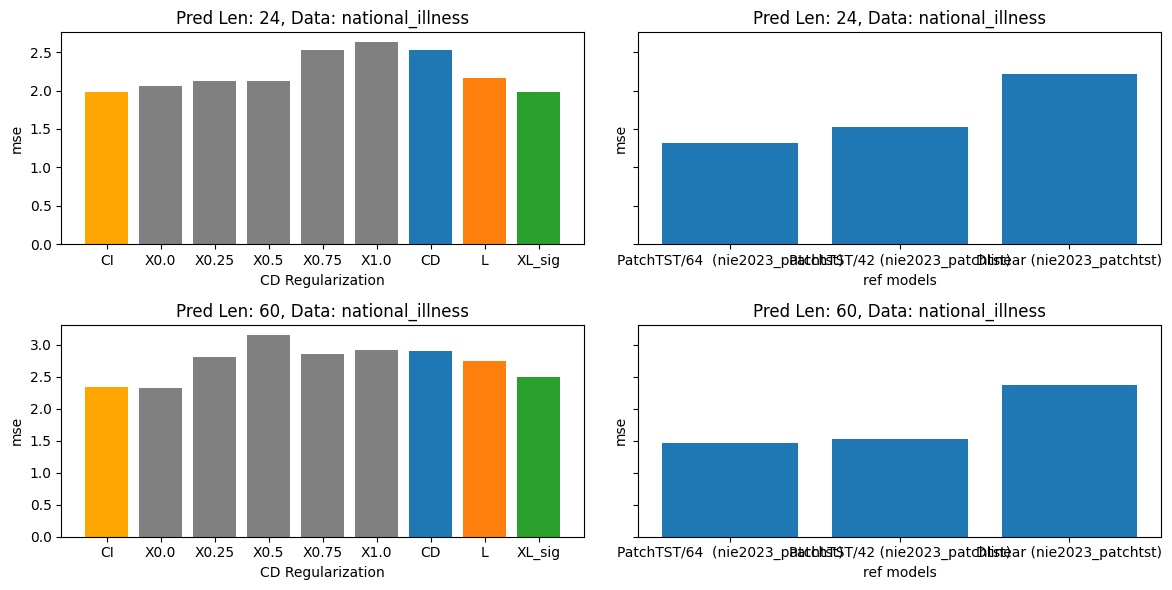

In [15]:
pred_len_list = [24, 60]
data_path_list = ["national_illness"]

fig, axs = plt.subplots(len(pred_len_list)*len(data_path_list), 2, figsize=(12, 6), sharey='row')

#df_ref = df_ref[(df_ref['data_path'] == "ETTh1")]

for i, pred_len in enumerate(pred_len_list):
    for j, data_path in enumerate(data_path_list):
        #df_CI = df_subset[(df_subset['model'] == "Linear") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len)]
        df_CI = df_subset[(df_subset['model'] == "Linear") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len) & (df_subset['seq_len'] == 104)]
        axs[i * len(data_path_list) + j, 0].bar("CI", df_CI[metric], color='orange')
        
        """
        df_filtered = df_delta[(df_delta['pred_len'] == pred_len) & (df_delta['data_path'] == data_path) & (df_delta['learn_cd_regularization'] == False) & (df_delta['convex'].isna())]
        axs[i * len(data_path_list) + j, 0].bar(df_filtered[hyperparam].astype(float).astype(str), df_filtered[metric])
        axs[i * len(data_path_list) + j, 0].set_title(f'Pred Len: {pred_len}, Data: {data_path}')
        axs[i * len(data_path_list) + j, 0].set_ylabel(metric)
        axs[i * len(data_path_list) + j, 0].set_xlabel("CD Regularization")
        """

        df_filtered = df_delta[(df_delta['pred_len'] == pred_len) & (df_delta['data_path'] == data_path) & (df_delta['learn_cd_regularization'] == 0) & (df_delta['convex'] == 1)]
        axs[i * len(data_path_list) + j, 0].bar("X"+df_filtered[hyperparam].astype(float).astype(str), df_filtered[metric], color='grey')
        axs[i * len(data_path_list) + j, 0].set_title(f'Pred Len: {pred_len}, Data: {data_path}')
        axs[i * len(data_path_list) + j, 0].set_ylabel(metric)
        axs[i * len(data_path_list) + j, 0].set_xlabel("CD Regularization")

        #df_CD = df_subset[(df_subset['model'] == "Linear_CD") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len)]
        df_CD = df_subset[(df_subset['model'] == "Linear_CD") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len) & (df_subset['seq_len'] == 104)]
        axs[i * len(data_path_list) + j, 0].bar("CD", df_CD[metric])

        df_filtered = df_delta[(df_delta['pred_len'] == pred_len) & (df_delta['data_path'] == data_path) & (df_delta['learn_cd_regularization'] == True) & (df_delta['convex'].isna())]
        axs[i * len(data_path_list) + j, 0].bar("L", df_filtered[metric])

        df_filtered = df_delta[(df_delta['pred_len'] == pred_len) & (df_delta['data_path'] == data_path) & (df_delta['learn_cd_regularization'] == 1) & (df_delta['convex'] == 1) & (df_delta['sigmoid'] == 1)]
        axs[i * len(data_path_list) + j, 0].bar("XL_sig", df_filtered[metric])

        df_filtered = df_ref[(df_ref['pred_len'] == str(pred_len)) & (df_ref['data_path'] == data_path)]    # str(pred_len) to match the type in df_ref, "Avg"...
        categories = df_filtered["ci_cd"].tolist()
        colors = [color_map[cat] for cat in categories]
        axs[i * len(data_path_list) + j, 1].bar(df_filtered["model_source"], df_filtered[metric], color=colors)
        axs[i * len(data_path_list) + j, 1].set_title(f'Pred Len: {pred_len}, Data: {data_path}')
        axs[i * len(data_path_list) + j, 1].set_ylabel(metric)
        axs[i * len(data_path_list) + j, 1].set_xlabel("ref models")

plt.tight_layout()
plt.savefig("plots/Delta/"+data_path+"_"+model+"_v2.png", dpi=300)
plt.show()

# Regularization

In [16]:
model = "Linear_Delta_reg"
metric = "mse"
hyperparam = "cd_weight_decay"

df_delta = df_subset[(df_subset['model'] == model)]
df_delta = df_delta.sort_values(by=hyperparam, ascending=True)

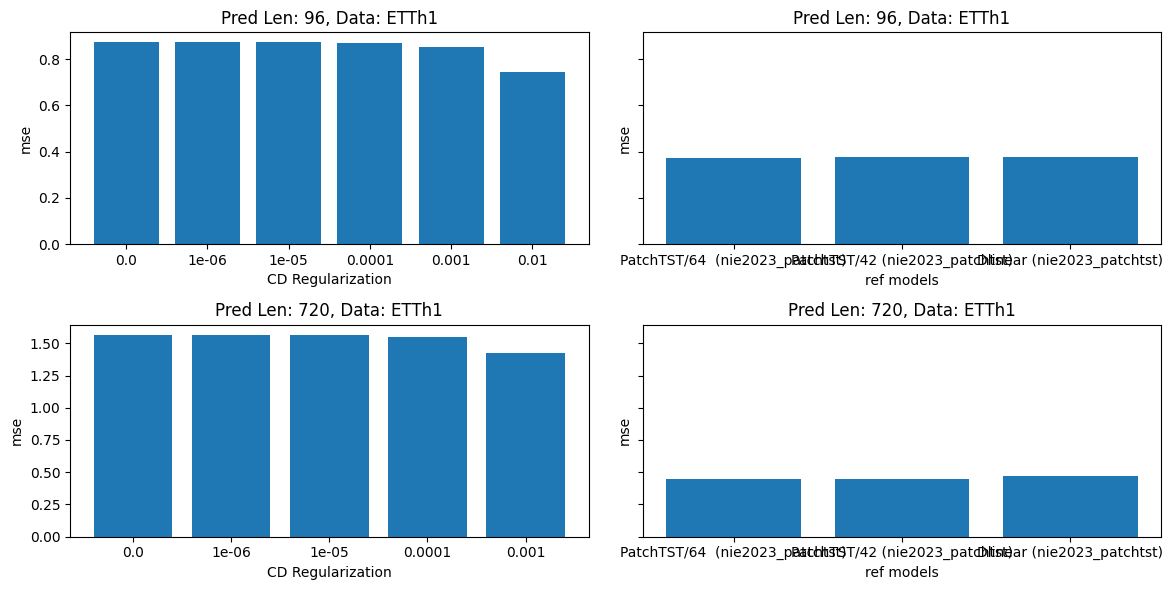

In [17]:
pred_len_list = [96, 720]
data_path_list = ["ETTh1"]

fig, axs = plt.subplots(len(pred_len_list)*len(data_path_list), 2, figsize=(12, 6), sharey='row')

for i, pred_len in enumerate(pred_len_list):
    for j, data_path in enumerate(data_path_list):
        df_filtered = df_delta[(df_delta['pred_len'] == pred_len) & (df_delta['data_path'] == data_path)]
        axs[i * len(data_path_list) + j, 0].bar(df_filtered[hyperparam].astype(float).astype(str), df_filtered[metric])
        axs[i * len(data_path_list) + j, 0].set_title(f'Pred Len: {pred_len}, Data: {data_path}')
        axs[i * len(data_path_list) + j, 0].set_ylabel(metric)
        axs[i * len(data_path_list) + j, 0].set_xlabel("CD Regularization")

        df_filtered = df_ref[(df_ref['pred_len'] == str(pred_len)) & (df_ref['data_path'] == data_path)]    # str(pred_len) to match the type in df_ref, "Avg"...
        categories = df_filtered["ci_cd"].tolist()
        colors = [color_map[cat] for cat in categories]
        axs[i * len(data_path_list) + j, 1].bar(df_filtered["model_source"], df_filtered[metric], color=colors)
        axs[i * len(data_path_list) + j, 1].set_title(f'Pred Len: {pred_len}, Data: {data_path}')
        axs[i * len(data_path_list) + j, 1].set_ylabel(metric)
        axs[i * len(data_path_list) + j, 1].set_xlabel("ref models")

plt.tight_layout()
plt.savefig("plots/Delta/"+data_path+"_"+model+".png", dpi=300)
plt.show()

# Shower example (dataset selection)
#### 1 Channel of exisiting dataset + lagged one

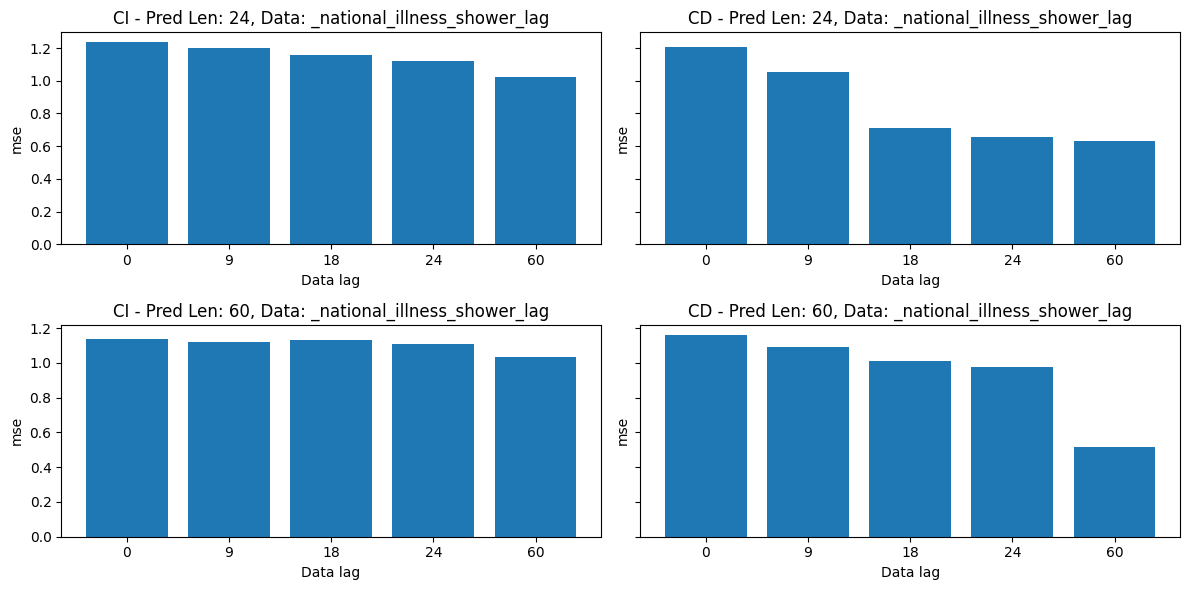

In [18]:
pred_len_list = [24, 60]
data_path_list = ["_national_illness_shower_lag"]

fig, axs = plt.subplots(len(pred_len_list)*len(data_path_list), 2, figsize=(12, 6), sharey='row')

#df_ref = df_ref[(df_ref['data_path'] == "ETTh1")]



for i, pred_len in enumerate(pred_len_list):
    for j, data_path in enumerate(data_path_list):
        df_CI = df_subset[(df_subset['model'] == "Linear") & (df_subset['data_path'].str.contains("_national_illness_shower_lag")) & (df_subset['pred_len'] == pred_len)].copy()
        df_CI['data_lag'] = df_CI['data_path'].str.extract(r'_([0-9]+)$').astype(int)
        df_CI = df_CI.sort_values(by='data_lag')
        axs[i * len(data_path_list) + j, 0].bar(df_CI['data_lag'].astype(str), df_CI[metric])
        axs[i * len(data_path_list) + j, 0].set_title(f'CI - Pred Len: {pred_len}, Data: {data_path}')
        axs[i * len(data_path_list) + j, 0].set_ylabel(metric)
        axs[i * len(data_path_list) + j, 0].set_xlabel("Data lag")

        df_CD = df_subset[(df_subset['model'] == "Linear_CD") & (df_subset['data_path'].str.contains("_national_illness_shower_lag")) & (df_subset['pred_len'] == pred_len)].copy()
        df_CD['data_lag'] = df_CD['data_path'].str.extract(r'_([0-9]+)$').astype(int)
        df_CD = df_CD.sort_values(by='data_lag')
        axs[i * len(data_path_list) + j, 1].bar(df_CD['data_lag'].astype(str), df_CD[metric])
        axs[i * len(data_path_list) + j, 1].set_title(f'CD - Pred Len: {pred_len}, Data: {data_path}')
        axs[i * len(data_path_list) + j, 1].set_ylabel(metric)
        axs[i * len(data_path_list) + j, 1].set_xlabel("Data lag")

plt.tight_layout()
plt.savefig("plots/Dataset_Selec/"+data_path+"_Linear.png")
plt.show()

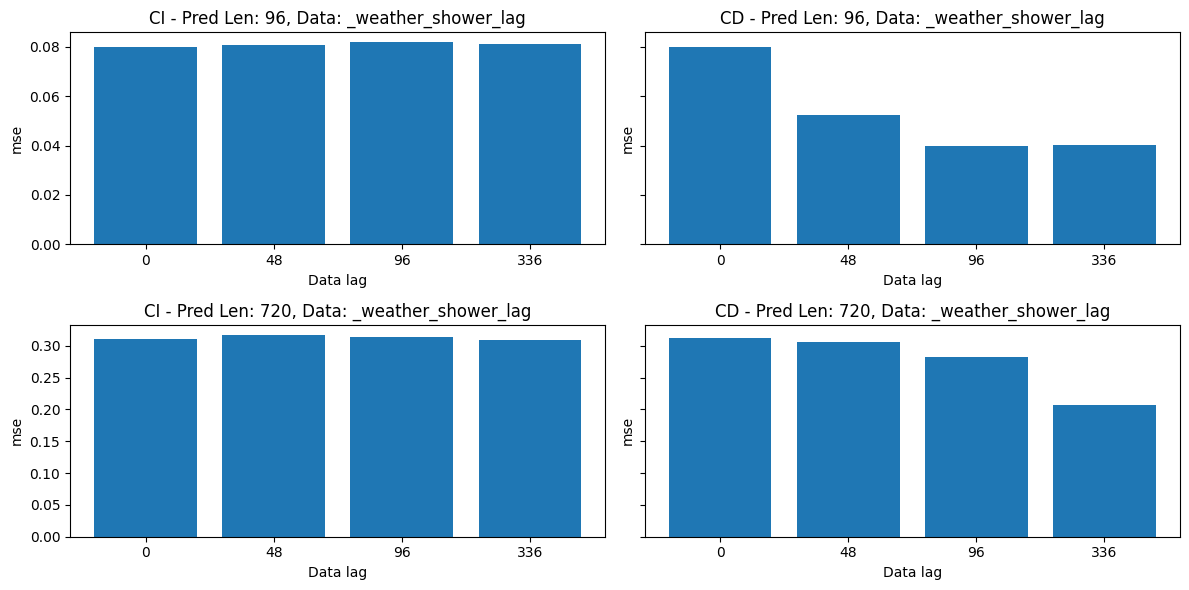

In [19]:
pred_len_list = [96, 720]
data_path_list = ["_weather_shower_lag"]

fig, axs = plt.subplots(len(pred_len_list)*len(data_path_list), 2, figsize=(12, 6), sharey='row')

#df_ref = df_ref[(df_ref['data_path'] == "ETTh1")]

for i, pred_len in enumerate(pred_len_list):
    for j, data_path in enumerate(data_path_list):
        df_CI = df_subset[(df_subset['model'] == "Linear") & (df_subset['data_path'].str.contains("_weather_shower_lag")) & (df_subset['pred_len'] == pred_len)].copy()
        df_CI['data_lag'] = df_CI['data_path'].str.extract(r'_([0-9]+)$').astype(int)
        df_CI = df_CI.sort_values(by='data_lag')
        axs[i * len(data_path_list) + j, 0].bar(df_CI['data_lag'].astype(str), df_CI[metric])
        axs[i * len(data_path_list) + j, 0].set_title(f'CI - Pred Len: {pred_len}, Data: {data_path}')
        axs[i * len(data_path_list) + j, 0].set_ylabel(metric)
        axs[i * len(data_path_list) + j, 0].set_xlabel("Data lag")

        df_CD = df_subset[(df_subset['model'] == "Linear_CD") & (df_subset['data_path'].str.contains("_weather_shower_lag")) & (df_subset['pred_len'] == pred_len)].copy()
        df_CD['data_lag'] = df_CD['data_path'].str.extract(r'_([0-9]+)$').astype(int)
        df_CD = df_CD.sort_values(by='data_lag')
        axs[i * len(data_path_list) + j, 1].bar(df_CD['data_lag'].astype(str), df_CD[metric])
        axs[i * len(data_path_list) + j, 1].set_title(f'CD - Pred Len: {pred_len}, Data: {data_path}')
        axs[i * len(data_path_list) + j, 1].set_ylabel(metric)
        axs[i * len(data_path_list) + j, 1].set_xlabel("Data lag")

plt.tight_layout()
plt.savefig("plots/Dataset_Selec/"+data_path+"_Linear.png")
plt.show()

# NEW Shower example (dataset selection)
#### 1 Channel of exisiting dataset + lagged one

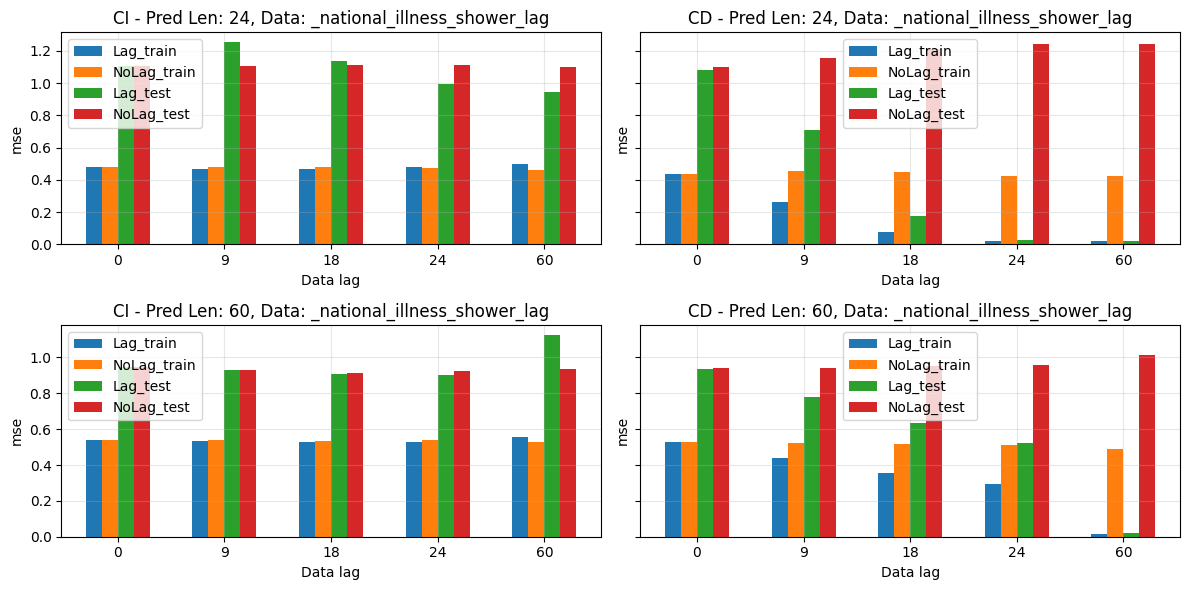

In [20]:
pred_len_list = [24, 60]
data_path_list = ["_national_illness_shower_lag"]

fig, axs = plt.subplots(len(pred_len_list)*len(data_path_list), 2, figsize=(12, 6), sharey='row')

for i, pred_len in enumerate(pred_len_list):
    for j, data_path in enumerate(data_path_list):
        df_CI = df_subset[(df_subset['model'] == "Linear") & (df_subset['data_path'].str.contains(data_path)) & (df_subset['pred_len'] == pred_len) & (df_subset["mse_train_per_channel_list"].notna())].copy()
        df_CI['data_lag'] = df_CI['data_path'].str.extract(r'_([0-9]+)$').astype(int)
        df_CI = df_CI.sort_values(by='data_lag')

        data_train = df_CI["mse_train_per_channel_list"].tolist()
        data_test = df_CI["mse_per_channel_list"].tolist()
        combined = [d1 + d2 for d1, d2 in zip(data_train, data_test)]
        
        data = list(map(list, zip(*combined)))        # "Transpose" the list of lists
        #display(data)

        x_labels = df_CI['data_lag'].astype(str).tolist()
        
        #group_labels = ['NoLag_train', 'Lag_train', 'NoLag_test', 'Lag_test']
        group_labels = ['Lag_train', 'NoLag_train', 'Lag_test', 'NoLag_test']

        bar_width = 0.15
        x = np.arange(len(x_labels))

        # Plot using a loop
        for l, group in enumerate(data):
            offset = (l - len(data)/2 + 0.5) * bar_width
            axs[i * len(data_path_list) + j, 0].bar(x + offset, group, width=bar_width, label=group_labels[l])

        axs[i * len(data_path_list) + j, 0].set_xticks(x)
        axs[i * len(data_path_list) + j, 0].set_xticklabels(x_labels)
        axs[i * len(data_path_list) + j, 0].set_title(f'CI - Pred Len: {pred_len}, Data: {data_path}')
        axs[i * len(data_path_list) + j, 0].set_ylabel(metric)
        axs[i * len(data_path_list) + j, 0].set_xlabel("Data lag")
        axs[i * len(data_path_list) + j, 0].legend()
        axs[i * len(data_path_list) + j, 0].grid(alpha=0.3)

        df_CD = df_subset[(df_subset['model'] == "Linear_CD") & (df_subset['data_path'].str.contains(data_path)) & (df_subset['pred_len'] == pred_len) & (df_subset["mse_train_per_channel_list"].notna())].copy()
        df_CD['data_lag'] = df_CD['data_path'].str.extract(r'_([0-9]+)$').astype(int)
        df_CD = df_CD.sort_values(by='data_lag')
        
        data_train = df_CD["mse_train_per_channel_list"].tolist()

        #display(data_train)

        data_test = df_CD["mse_per_channel_list"].tolist()
        combined = [d1 + d2 for d1, d2 in zip(data_train, data_test)]
        
        data = list(map(list, zip(*combined)))        # "Transpose" the list of lists
        x_labels = df_CD['data_lag'].astype(str).tolist()
        
        #group_labels = ['NoLag_train', 'Lag_train', 'NoLag_test', 'Lag_test']
        group_labels = ['Lag_train', 'NoLag_train', 'Lag_test', 'NoLag_test']

        bar_width = 0.15
        x = np.arange(len(x_labels))

        # Plot using a loop
        for l, group in enumerate(data):
            offset = (l - len(data)/2 + 0.5) * bar_width
            axs[i * len(data_path_list) + j, 1].bar(x + offset, group, width=bar_width, label=group_labels[l])

        axs[i * len(data_path_list) + j, 1].set_xticks(x)
        axs[i * len(data_path_list) + j, 1].set_xticklabels(x_labels)        
        
        
        #axs[i * len(data_path_list) + j, 1].bar(df_CD['data_lag'].astype(str), df_CD[metric])
        axs[i * len(data_path_list) + j, 1].set_title(f'CD - Pred Len: {pred_len}, Data: {data_path}')
        axs[i * len(data_path_list) + j, 1].set_ylabel(metric)
        axs[i * len(data_path_list) + j, 1].set_xlabel("Data lag")
        axs[i * len(data_path_list) + j, 1].legend()
        axs[i * len(data_path_list) + j, 1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig("plots/Dataset_Selec/"+data_path+"_Linear_v2.png")
plt.show()

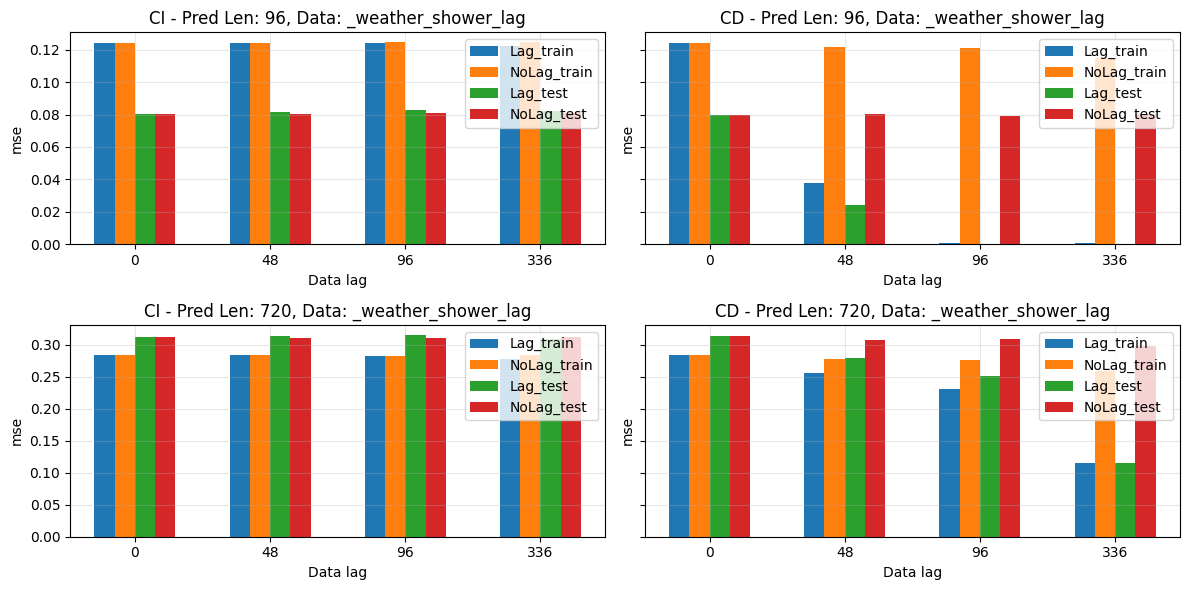

In [21]:
pred_len_list = [96, 720]
data_path_list = ["_weather_shower_lag"]

fig, axs = plt.subplots(len(pred_len_list)*len(data_path_list), 2, figsize=(12, 6), sharey='row')

for i, pred_len in enumerate(pred_len_list):
    for j, data_path in enumerate(data_path_list):
        df_CI = df_subset[(df_subset['model'] == "Linear") & (df_subset['data_path'].str.contains(data_path)) & (df_subset['pred_len'] == pred_len) & (df_subset["mse_train_per_channel_list"].notna())].copy()
        df_CI['data_lag'] = df_CI['data_path'].str.extract(r'_([0-9]+)$').astype(int)
        df_CI = df_CI.sort_values(by='data_lag')

        data_train = df_CI["mse_train_per_channel_list"].tolist()
        data_test = df_CI["mse_per_channel_list"].tolist()
        combined = [d1 + d2 for d1, d2 in zip(data_train, data_test)]
        
        data = list(map(list, zip(*combined)))        # "Transpose" the list of lists
        #display(data)

        x_labels = df_CI['data_lag'].astype(str).tolist()
        
        #group_labels = ['NoLag_train', 'Lag_train', 'NoLag_test', 'Lag_test']
        group_labels = ['Lag_train', 'NoLag_train', 'Lag_test', 'NoLag_test']

        bar_width = 0.15
        x = np.arange(len(x_labels))

        # Plot using a loop
        for l, group in enumerate(data):
            offset = (l - len(data)/2 + 0.5) * bar_width
            axs[i * len(data_path_list) + j, 0].bar(x + offset, group, width=bar_width, label=group_labels[l])

        axs[i * len(data_path_list) + j, 0].set_xticks(x)
        axs[i * len(data_path_list) + j, 0].set_xticklabels(x_labels)
        axs[i * len(data_path_list) + j, 0].set_title(f'CI - Pred Len: {pred_len}, Data: {data_path}')
        axs[i * len(data_path_list) + j, 0].set_ylabel(metric)
        axs[i * len(data_path_list) + j, 0].set_xlabel("Data lag")
        axs[i * len(data_path_list) + j, 0].legend()
        axs[i * len(data_path_list) + j, 0].grid(alpha=0.3)

        df_CD = df_subset[(df_subset['model'] == "Linear_CD") & (df_subset['data_path'].str.contains(data_path)) & (df_subset['pred_len'] == pred_len) & (df_subset["mse_train_per_channel_list"].notna())].copy()
        df_CD['data_lag'] = df_CD['data_path'].str.extract(r'_([0-9]+)$').astype(int)
        df_CD = df_CD.sort_values(by='data_lag')
        
        data_train = df_CD["mse_train_per_channel_list"].tolist()

        #display(data_train)

        data_test = df_CD["mse_per_channel_list"].tolist()
        combined = [d1 + d2 for d1, d2 in zip(data_train, data_test)]
        
        data = list(map(list, zip(*combined)))        # "Transpose" the list of lists
        x_labels = df_CD['data_lag'].astype(str).tolist()
        
        #group_labels = ['NoLag_train', 'Lag_train', 'NoLag_test', 'Lag_test']
        group_labels = ['Lag_train', 'NoLag_train', 'Lag_test', 'NoLag_test']

        bar_width = 0.15
        x = np.arange(len(x_labels))

        # Plot using a loop
        for l, group in enumerate(data):
            offset = (l - len(data)/2 + 0.5) * bar_width
            axs[i * len(data_path_list) + j, 1].bar(x + offset, group, width=bar_width, label=group_labels[l])

        axs[i * len(data_path_list) + j, 1].set_xticks(x)
        axs[i * len(data_path_list) + j, 1].set_xticklabels(x_labels)        
        
        
        #axs[i * len(data_path_list) + j, 1].bar(df_CD['data_lag'].astype(str), df_CD[metric])
        axs[i * len(data_path_list) + j, 1].set_title(f'CD - Pred Len: {pred_len}, Data: {data_path}')
        axs[i * len(data_path_list) + j, 1].set_ylabel(metric)
        axs[i * len(data_path_list) + j, 1].set_xlabel("Data lag")
        axs[i * len(data_path_list) + j, 1].legend()
        axs[i * len(data_path_list) + j, 1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig("plots/Dataset_Selec/"+data_path+"_Linear_v2.png")
plt.show()

## Check Avg error channel-wise = error

In [22]:
import statistics

pred_len_list = [96, 720]
data_path_list = ["ETTh1", "weather"]

decimals = 5

for i, pred_len in enumerate(pred_len_list):
    for j, data_path in enumerate(data_path_list):
        df_CI = df_subset[(df_subset['data_path'].str.contains(data_path)) & (df_subset['pred_len'] == pred_len) & (df_subset["mse_train_per_channel_list"].notna())].copy()
        
        for index, row in df_CI.iterrows():
            print(index, data_path, round(statistics.mean(row['mse_per_channel_list']), decimals), round(statistics.mean(row['mse_train_per_channel_list']), decimals))
            print(index, data_path, round(row['mse'], decimals), round(row['mse_train'], decimals))
            print()
            print(index, data_path, round(statistics.mean(row['mae_per_channel_list']), decimals), round(statistics.mean(row['mae_train_per_channel_list']), decimals))
            print(index, data_path, round(row['mae'], decimals), round(row['mae_train'], decimals))
            print()
            

287 ETTh1 0.87179 0.33947
287 ETTh1 0.87179 0.33947

287 ETTh1 0.69852 0.42712
287 ETTh1 0.69852 0.42712

289 ETTh1 0.87177 0.33947
289 ETTh1 0.87177 0.33947

289 ETTh1 0.69851 0.42711
289 ETTh1 0.69851 0.42711

291 ETTh1 0.87159 0.33942
291 ETTh1 0.87159 0.33942

291 ETTh1 0.69841 0.42707
291 ETTh1 0.69841 0.42707

293 ETTh1 0.86976 0.339
293 ETTh1 0.86976 0.339

293 ETTh1 0.69749 0.42667
293 ETTh1 0.69749 0.42667

295 ETTh1 0.85246 0.33541
295 ETTh1 0.85246 0.33541

295 ETTh1 0.68877 0.42314
295 ETTh1 0.68877 0.42314

297 ETTh1 0.74473 0.3305
297 ETTh1 0.74473 0.3305

297 ETTh1 0.6331 0.4151
297 ETTh1 0.6331 0.4151

334 ETTh1 0.83933 0.32559
334 ETTh1 0.83933 0.32559

334 ETTh1 0.68966 0.41631
334 ETTh1 0.68966 0.41631

338 ETTh1 0.39794 0.35044
338 ETTh1 0.39794 0.35044

338 ETTh1 0.42353 0.41947
338 ETTh1 0.42353 0.41947

387 ETTh1 0.37985 0.31008
387 ETTh1 0.37985 0.31008

387 ETTh1 0.39878 0.38805
387 ETTh1 0.39878 0.38805

392 ETTh1 0.40765 0.36068
392 ETTh1 0.40765 0.36068

392

# Linear final - channel-wise

In [23]:
def visualize(pred_len_list, data_path_list, df_subset):
    fig, axs = plt.subplots(len(pred_len_list)*len(data_path_list), 2, figsize=(12, 6), sharey='row')

    for i, pred_len in enumerate(pred_len_list):
        for j, data_path in enumerate(data_path_list):
            df_CI = df_subset[(df_subset['model'] == "Linear_final") & (df_subset['channel_handling'] == "CI_glob") & (df_subset['data_path'].str.contains(data_path)) & (df_subset['pred_len'] == pred_len)].copy()
            df_CI = df_CI.sort_values(by='data_lag')

            data_train = df_CI["mse_train_per_channel_list"].tolist()
            data_test = df_CI["mse_per_channel_list"].tolist()
            combined = [d1 + d2 for d1, d2 in zip(data_train, data_test)]
            
            data = list(map(list, zip(*combined)))        # "Transpose" the list of lists
            #display(data)

            x_labels = df_CI['data_lag'].astype(str).tolist()
            
            #group_labels = ['NoLag_train', 'Lag_train', 'NoLag_test', 'Lag_test']
            group_labels = ['Lag_train', 'NoLag_train', 'Lag_test', 'NoLag_test']

            bar_width = 0.15
            x = np.arange(len(x_labels))

            # Plot using a loop
            for l, group in enumerate(data):
                offset = (l - len(data)/2 + 0.5) * bar_width
                axs[i * len(data_path_list) + j, 0].bar(x + offset, group, width=bar_width, label=group_labels[l])

            axs[i * len(data_path_list) + j, 0].set_xticks(x)
            axs[i * len(data_path_list) + j, 0].set_xticklabels(x_labels)
            axs[i * len(data_path_list) + j, 0].set_title(f'CI - Pred Len: {pred_len}, Data: {data_path}')
            axs[i * len(data_path_list) + j, 0].set_ylabel(metric)
            axs[i * len(data_path_list) + j, 0].set_xlabel("Data lag")
            axs[i * len(data_path_list) + j, 0].legend()
            axs[i * len(data_path_list) + j, 0].grid(alpha=0.3)

            df_CD = df_subset[(df_subset['model'] == "Linear_CD") & (df_subset['data_path'].str.contains(data_path)) & (df_subset['pred_len'] == pred_len) & (df_subset["mse_train_per_channel_list"].notna())].copy()
            df_CD['data_lag'] = df_CD['data_path'].str.extract(r'_([0-9]+)$').astype(int)
            df_CD = df_CD.sort_values(by='data_lag')
            
            data_train = df_CD["mse_train_per_channel_list"].tolist()

            #display(data_train)

            data_test = df_CD["mse_per_channel_list"].tolist()
            combined = [d1 + d2 for d1, d2 in zip(data_train, data_test)]
            
            data = list(map(list, zip(*combined)))        # "Transpose" the list of lists
            x_labels = df_CD['data_lag'].astype(str).tolist()
            
            #group_labels = ['NoLag_train', 'Lag_train', 'NoLag_test', 'Lag_test']
            group_labels = ['Lag_train', 'NoLag_train', 'Lag_test', 'NoLag_test']

            bar_width = 0.15
            x = np.arange(len(x_labels))

            # Plot using a loop
            for l, group in enumerate(data):
                offset = (l - len(data)/2 + 0.5) * bar_width
                axs[i * len(data_path_list) + j, 1].bar(x + offset, group, width=bar_width, label=group_labels[l])

            axs[i * len(data_path_list) + j, 1].set_xticks(x)
            axs[i * len(data_path_list) + j, 1].set_xticklabels(x_labels)        
            
            
            #axs[i * len(data_path_list) + j, 1].bar(df_CD['data_lag'].astype(str), df_CD[metric])
            axs[i * len(data_path_list) + j, 1].set_title(f'CD - Pred Len: {pred_len}, Data: {data_path}')
            axs[i * len(data_path_list) + j, 1].set_ylabel(metric)
            axs[i * len(data_path_list) + j, 1].set_xlabel("Data lag")
            axs[i * len(data_path_list) + j, 1].legend()
            axs[i * len(data_path_list) + j, 1].grid(alpha=0.3)

    plt.tight_layout()
    #plt.savefig("plots/Dataset_Selec/"+data_path+"_Linear_v2.png")
    plt.show()
    return



In [24]:
def channel_handling(data_path="ETTh1", pred_len=96):
    channel_handling_list = ["CI_glob", "CI_loc", "CD", "Delta"]

    fig = plt.figure(figsize=(16, 4))
    gs = gridspec.GridSpec(1, 4, width_ratios=[1, 1, 4, 4], wspace=0.3)
    axes = [plt.subplot(gs[i]) for i in range(4)]

    bar_width = 0.4
    colors = ['#1f77b4', '#ff7f0e']  # blue (train), orange (test)

    for col, ch_handling in enumerate(channel_handling_list):
        ax = axes[col]

        df_CI = df_subset[
            (df_subset['model'] == "Linear_final") &
            (df_subset['channel_handling'] == ch_handling) &
            (df_subset['data_path'].str.contains(data_path)) &
            (df_subset['pred_len'] == pred_len)
        ].copy()

        # Extract values
        cd_labels = df_CI['cd_weight_decay'].astype(str).tolist()
        data_train = df_CI["mse_train"].tolist()
        data_test = df_CI["mse"].tolist()

        x = np.arange(len(cd_labels))

        # Plot grouped bars
        ax.bar(x - bar_width/2, data_train, width=bar_width, color=colors[0], label='Train')
        ax.bar(x + bar_width/2, data_test,  width=bar_width, color=colors[1], label='Test')

        # Labeling
        ax.set_title(ch_handling)
        ax.set_xlabel("CD Reg.")
        ax.set_xticks(x)
        ax.set_xticklabels(cd_labels, rotation=45)
        ax.legend()

        if col == 0:
            ax.set_ylabel("MSE")

    # Collect all values
    all_mse = df_subset[
        (df_subset['model'] == "Linear_final") &
        (df_subset['data_path'].str.contains(data_path)) &
        (df_subset['pred_len'] == pred_len)
    ][["mse", "mse_train"]].values.flatten()

    y_max = np.max(all_mse)

    # Share y-axis across subplots
    for ax in axes[1:]:
        ax.sharey(axes[0])
        ax.tick_params(labelleft=False)
        ax.set_ylim(0, y_max*1.05)

    fig.suptitle(f"{data_path} | pred_len={pred_len}", fontsize=10)
    plt.savefig("plots/final_channel_handling/"+data_path+"_"+str(pred_len)+".png")
    plt.show()


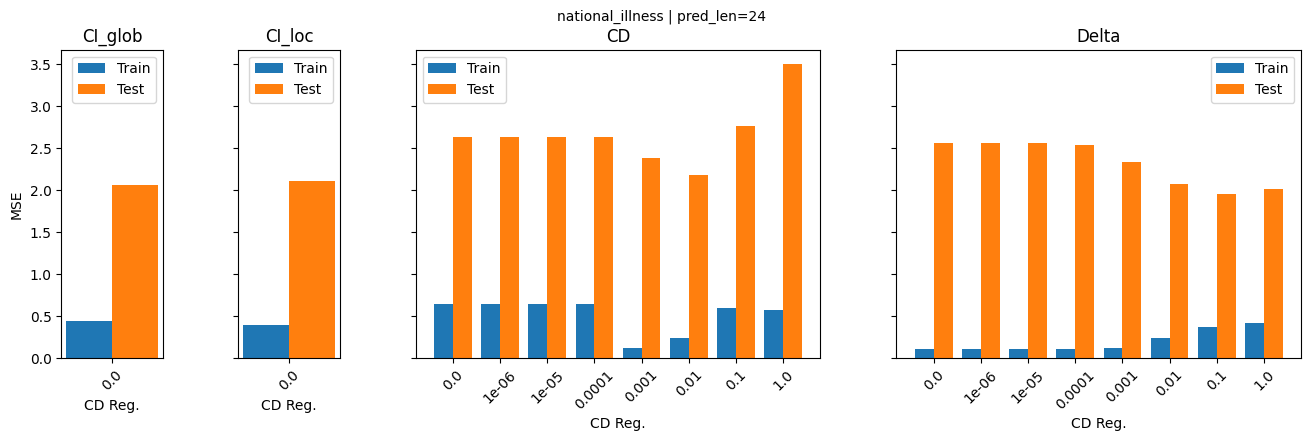

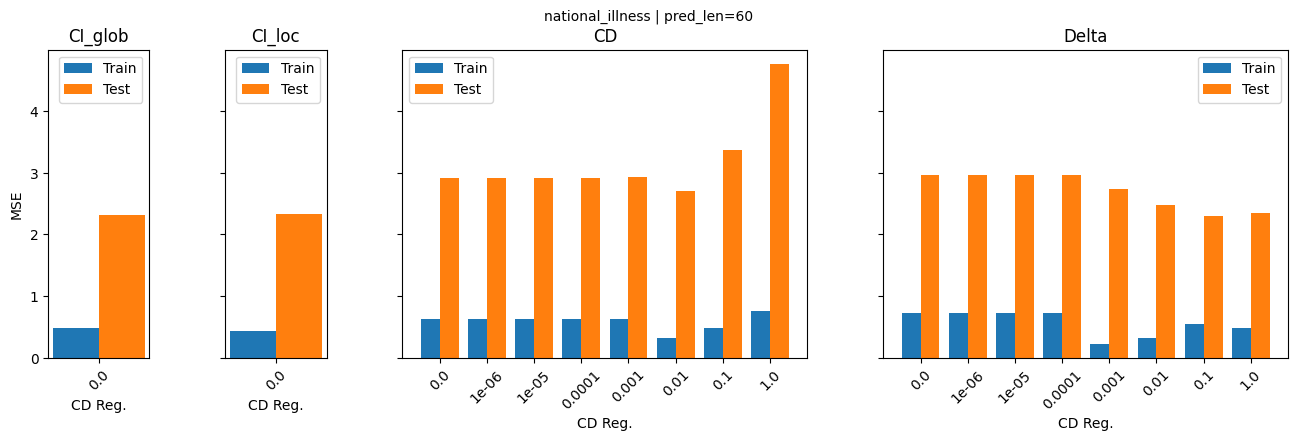

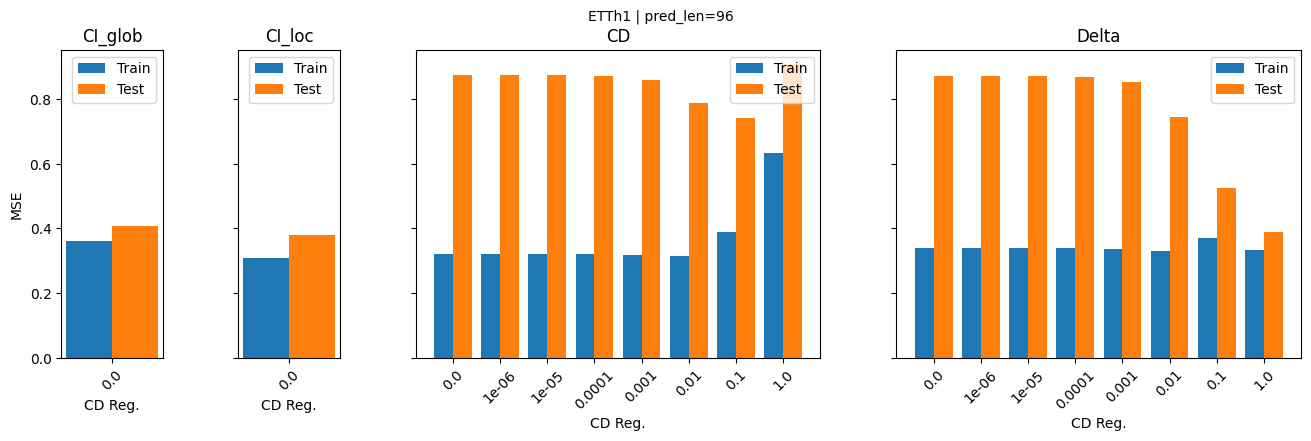

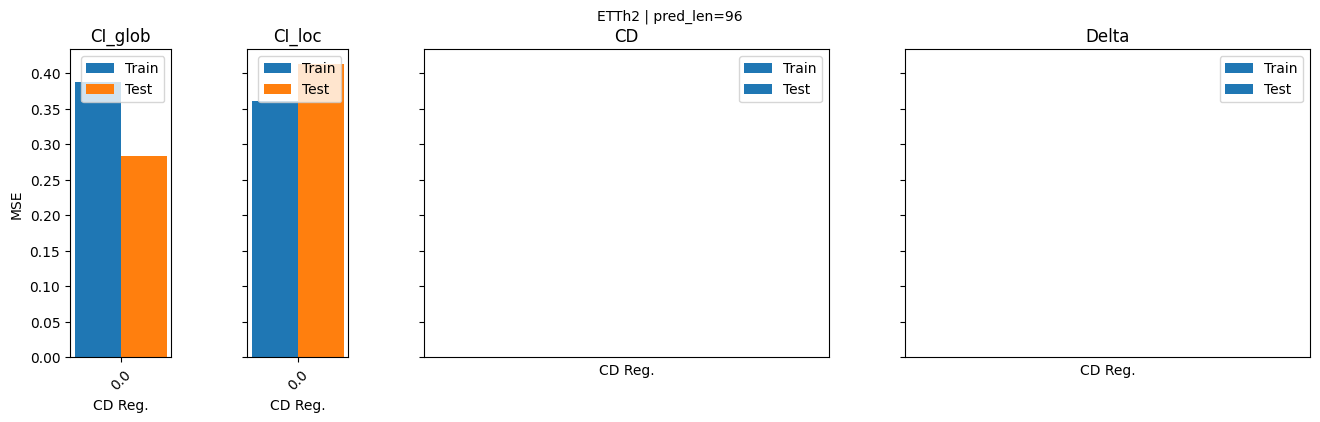

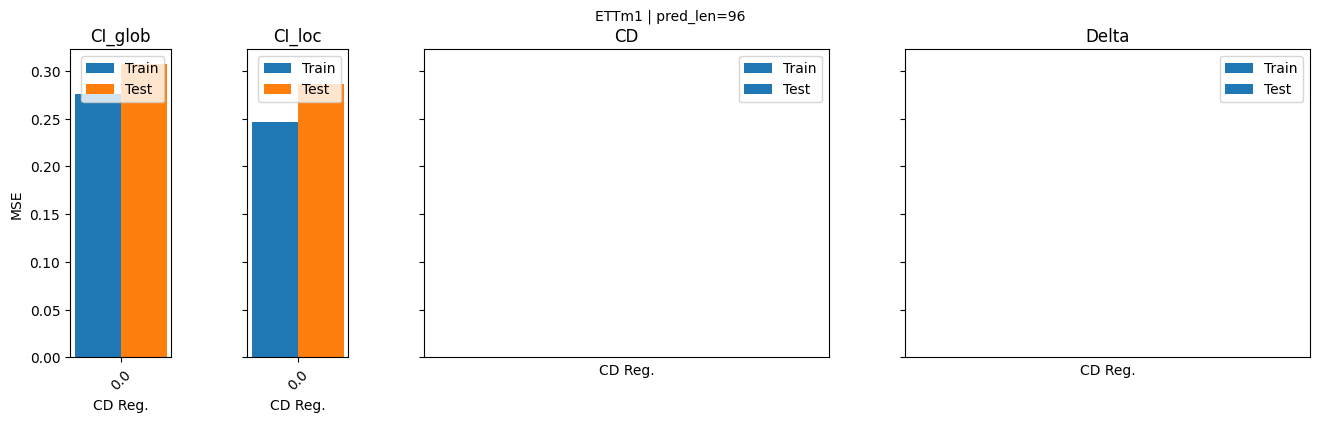

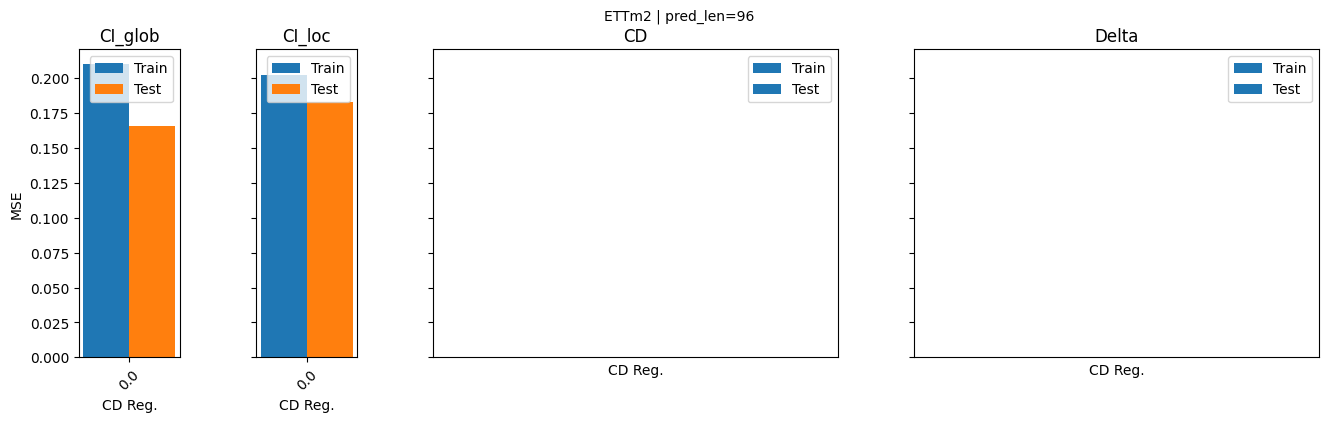

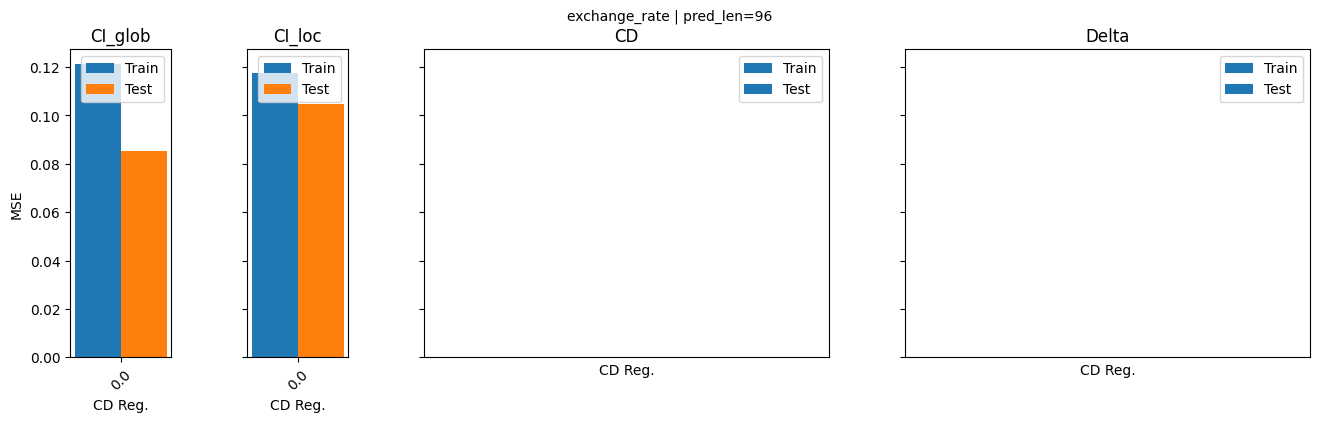

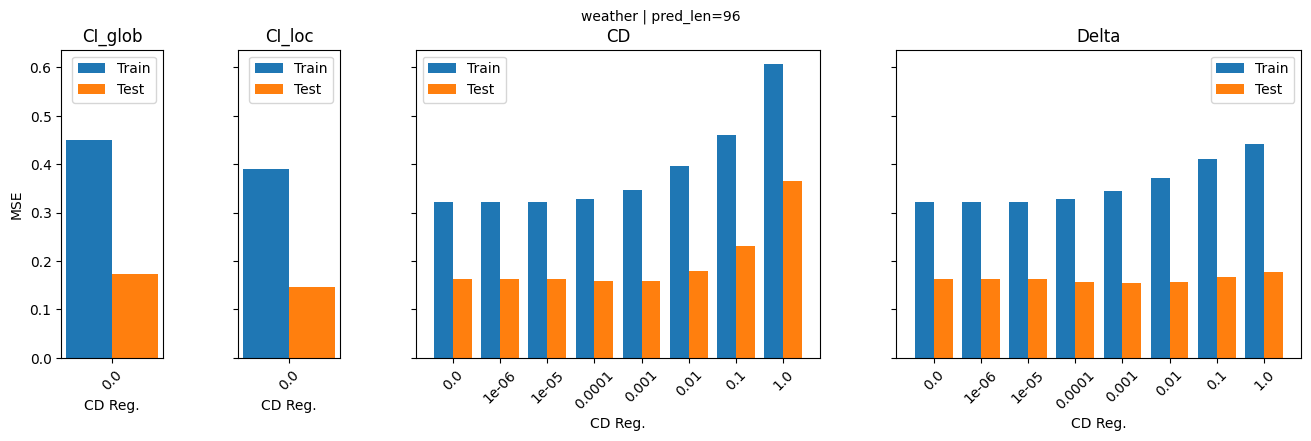

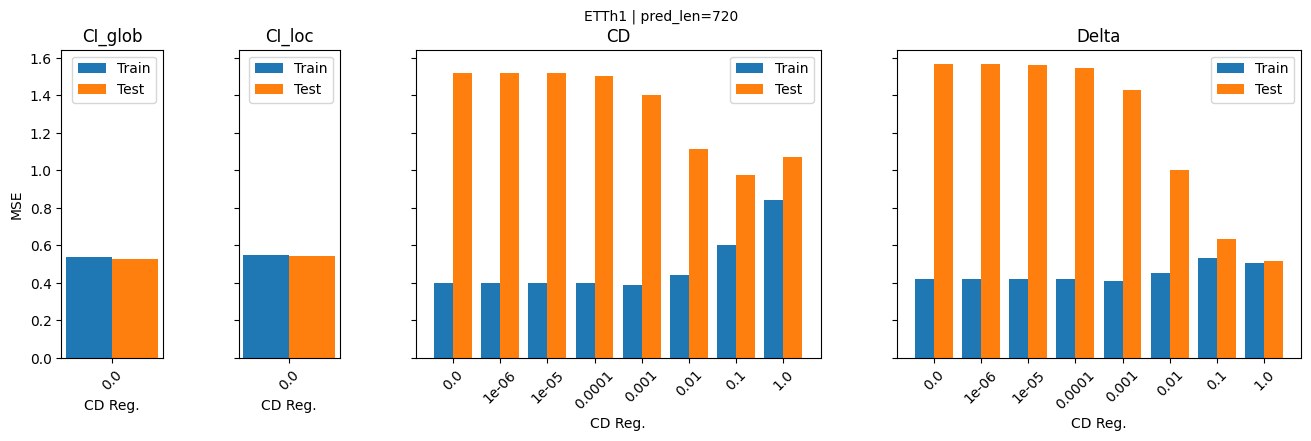

In [25]:
channel_handling(data_path="national_illness", pred_len=24)
channel_handling(data_path="national_illness", pred_len=60)
channel_handling(data_path="ETTh1", pred_len=96)
channel_handling(pred_len=96, data_path="ETTh2")
channel_handling(pred_len=96, data_path="ETTm1")
channel_handling(pred_len=96, data_path="ETTm2")
channel_handling(pred_len=96, data_path="exchange_rate")
channel_handling(data_path="weather", pred_len=96)
channel_handling(data_path="ETTh1", pred_len=720)

In [26]:
def channel_wise(pred_len=24, data_path="national_illness", model= [["CI_glob", 0], ["CI_loc", 0], ["CD", 0], ["Delta", 0]], df_subset=df_subset):
    fig, axs = plt.subplots(2, 2, figsize=(12, 6), sharey=True)
    
    for row in [0, 1]:
        for col in [0, 1]:
            ax = axs[row, col]
            channel_handling = model[2*row+col][0]
            cd_weight_decay = model[2*row+col][1]

            df_CI = df_subset[
                (df_subset['model'] == "Linear_final") &
                (df_subset['channel_handling'] == channel_handling) &
                (df_subset['cd_weight_decay'] == cd_weight_decay) &
                (df_subset['data_path'].str.contains(data_path)) &
                (df_subset['pred_len'] == pred_len)
            ].copy()

            #display(df_CI)
            
            # Extract lists
            data_train = df_CI["mse_train_per_channel_list"].tolist()
            data_test = df_CI["mse_per_channel_list"].tolist()

            # Combine per channel
            combined = [[train, test] for train, test in zip(data_train[0], data_test[0])]

            data = list(map(list, zip(*combined)))  # shape: 2 × 7

            group_labels = ['train', 'test']
            colors = ['#1f77b4', '#ff7f0e']  # train, test
            bar_width = 0.35
            x = np.arange(len(combined))  # 7 channels

            # Plot on axs[0, 0]
            for i, group in enumerate(data):
                offset = (i - len(data)/2 + 0.5) * bar_width
                ax.bar(x + offset, group, width=bar_width, label=group_labels[i], color=colors[i])

            # Horizontal lines
            ax.axhline(y=df_CI["mse_train"].values[0], color=colors[0], linestyle='--', linewidth=1)
            ax.axhline(y=df_CI["mse"].values[0], color=colors[1], linestyle='--', linewidth=1)

            # Formatting
            ax.set_xticks(x)
            ax.set_xticklabels([f'Ch {i+1}' for i in x])
            ax.set_title(channel_handling)
            ax.grid(alpha=0.25)
            ax.legend()
            
    fig.suptitle(f"{data_path} | pred_len={pred_len}", fontsize=10)
    fig.tight_layout()
    plt.savefig("plots/final_channel_wise/"+data_path+"_"+str(pred_len)+".png")
    plt.show()

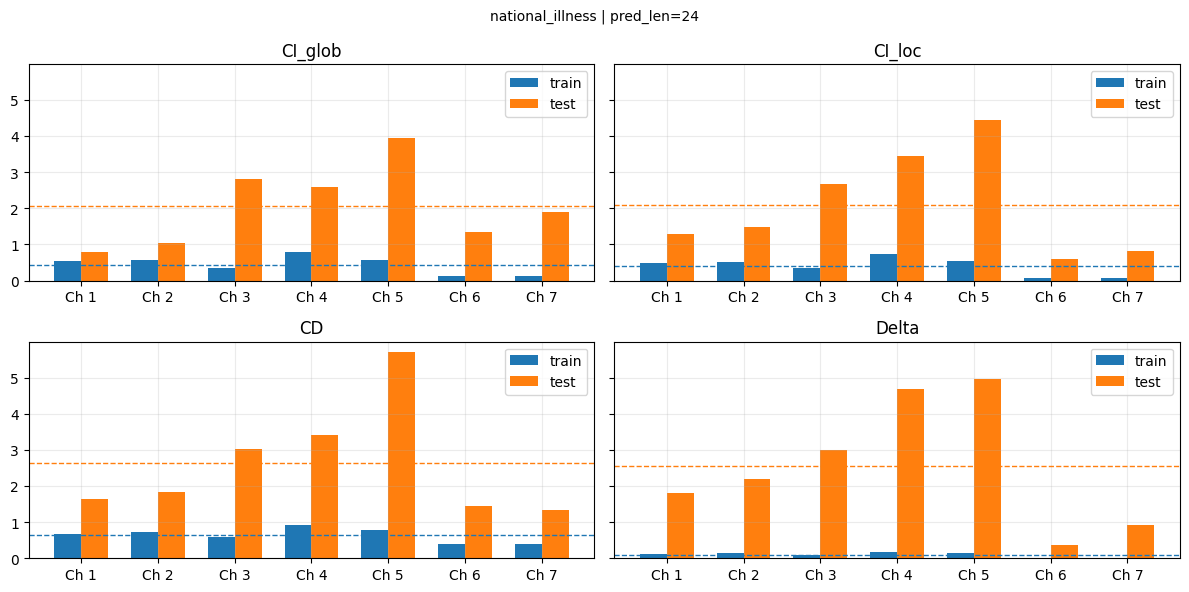

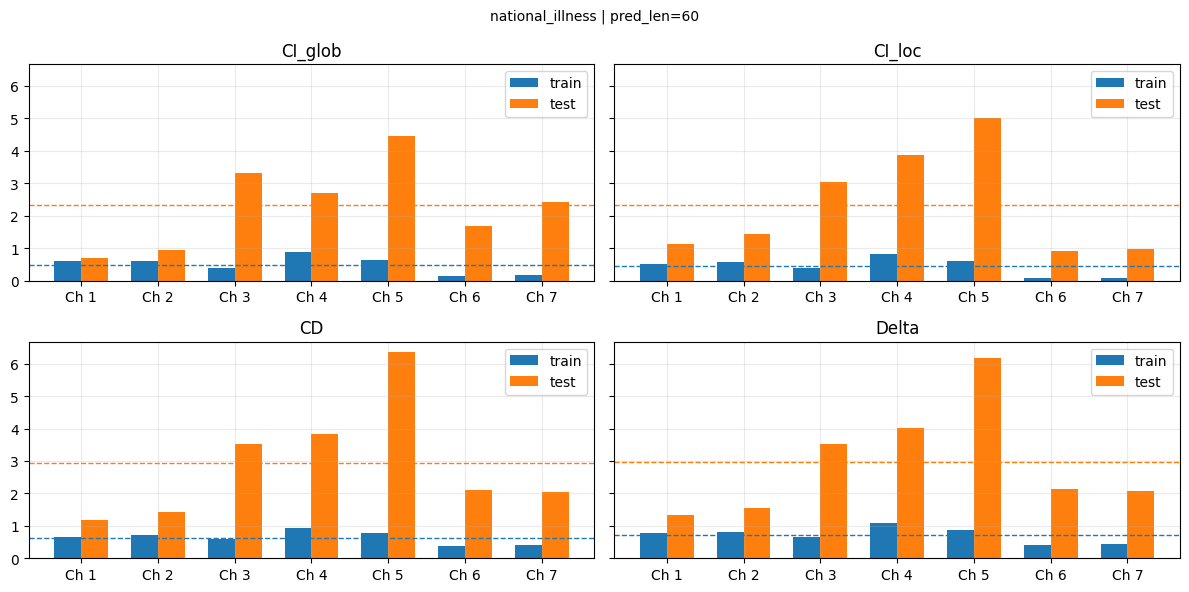

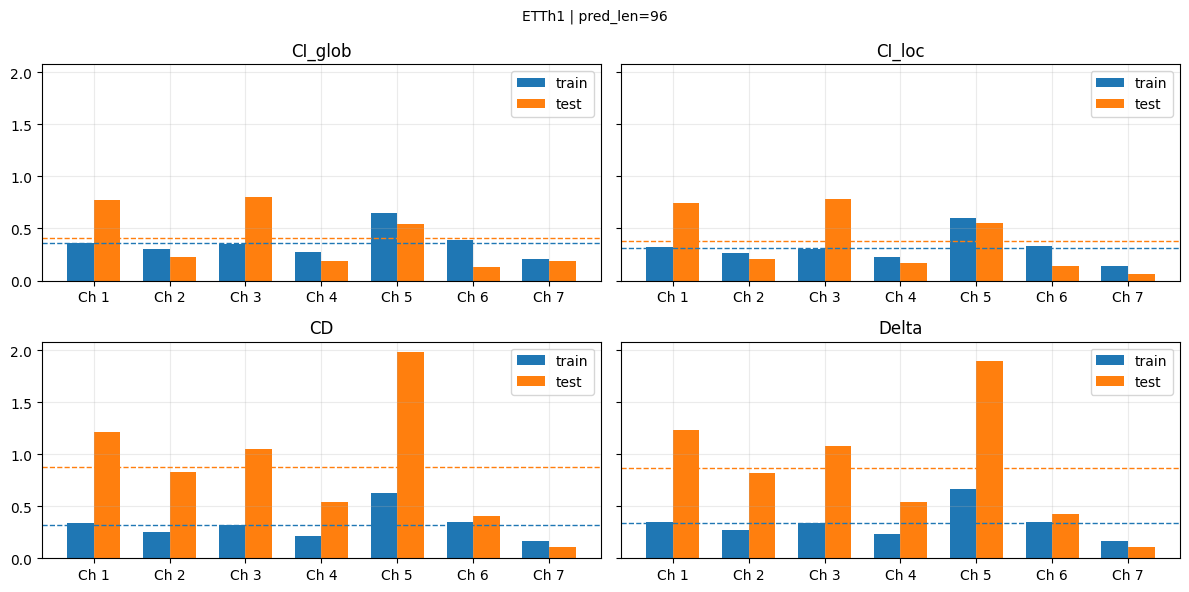

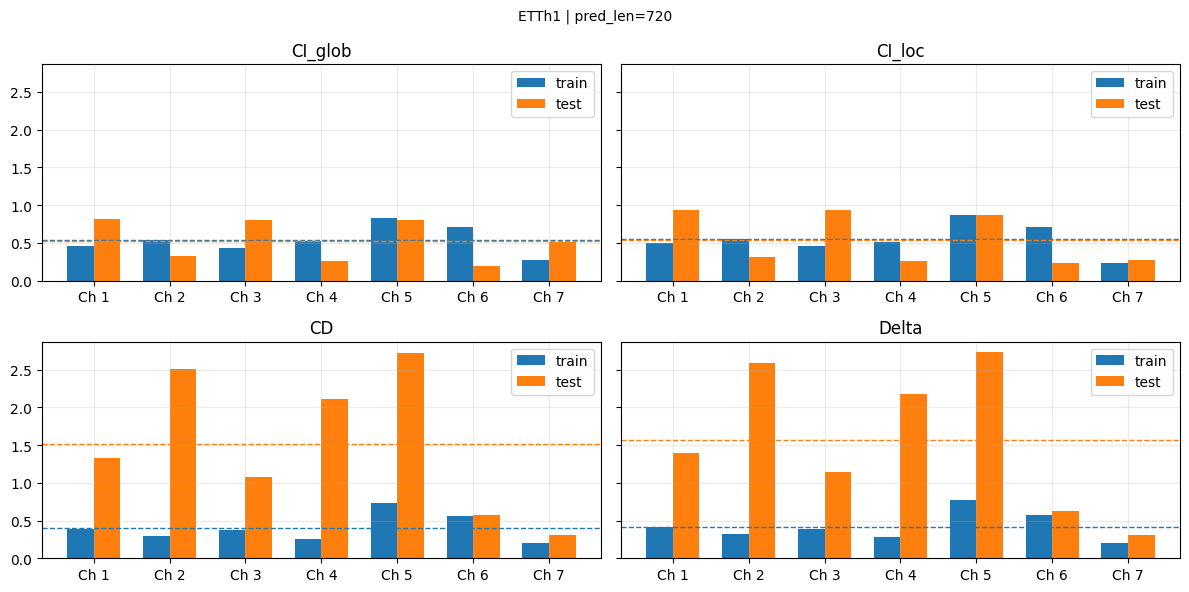

IndexError: list index out of range

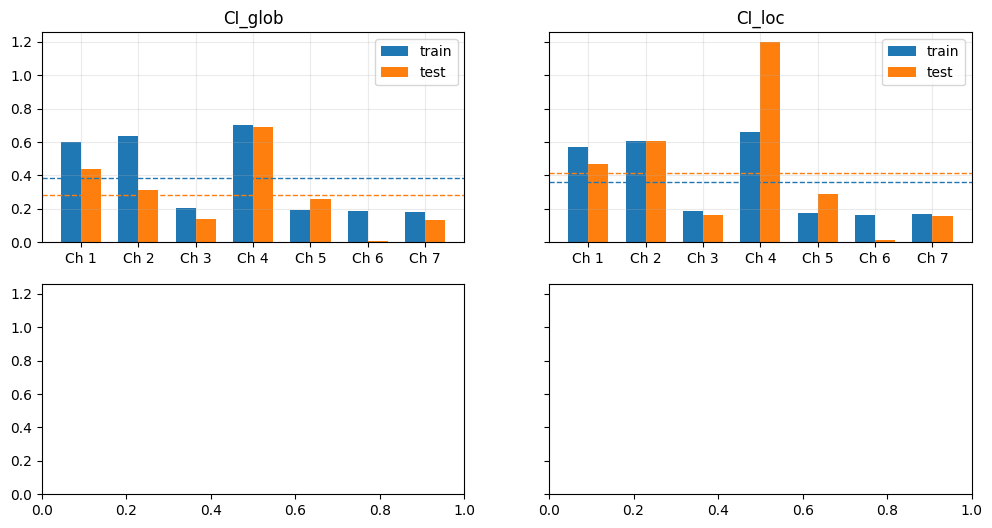

In [27]:
channel_wise(pred_len=24, data_path="national_illness")
channel_wise(pred_len=60, data_path="national_illness")
channel_wise(pred_len=96, data_path="ETTh1")
channel_wise(pred_len=720, data_path="ETTh1")
channel_wise(pred_len=96, data_path="ETTh2")
channel_wise(pred_len=96, data_path="ETTm1")
channel_wise(pred_len=96, data_path="exchange_rate")
channel_wise(pred_len=96, data_path="weather")